In [355]:
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import gseapy as gp

from gseapy import barplot, dotplot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

from lifelines import KaplanMeierFitter as KM
from lifelines import CoxPHFitter as cox
from matplotlib import pyplot as plt
from pandas import DataFrame as df
from scipy import stats
from IPython.display import Image

import matplotlib
import matplotlib.font_manager as fm
from matplotlib.ft2font import FT2Font
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def get_font(*args, **kwargs):
    return FT2Font(*args, **kwargs)

fm.get_font = get_font

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [366]:
import gc
gc.collect()

20

# Global Paths

In [3]:
data_home = '/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/data/'
gsea_home = '/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/GSEA/'
result_home = '/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/results/UCLA/'
panel_home = '/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/panels/UCLA/'
table_home = '/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/Tables/UCLA/'

# Data

In [4]:
gene_sets = {}
with open(gsea_home + '/gene_sets/NREC_REC_91061.gmt', 'r') as f:
    for lines in f:
        lines = lines.rstrip().split('\t')
        gene_sets[lines[0]] = lines[2:]

In [5]:
gabris_56 = pd.read_csv(data_home + 'UCLA/all_56_gabris.stringtie.FPKM_invitro_and_invivo.txt',
                        header=0, index_col=0, sep='\t')
gabris_56.head()

/home/dyang-server/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Gene Name,Reference,Strand,Start,End,B16_IFNG-KO62_IFNg_1,B16_IFNG-KO62_IFNg_2,B16_IFNG-KO62_IFNg_3,B16_IFNG-KO62_media_1,B16_IFNG-KO62_media_2,...,B16_invivo_last-KO62_anti-PD-1_3,B16_invivo_last-KO62_anti-PD-1_4,B16_invivo_last-WT_Isotype_1,B16_invivo_last-WT_Isotype_2,B16_invivo_last-WT_Isotype_3,B16_invivo_last-WT_Isotype_4,B16_invivo_last-WT_anti-PD-1_1,B16_invivo_last-WT_anti-PD-1_2,B16_invivo_last-WT_anti-PD-1_3,B16_invivo_last-WT_anti-PD-1_4
Gene ID,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000051951,Xkr4,1,-,3205901,3671498,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
ENSMUSG00000102851,Gm18956,1,+,3252757,3253236,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
ENSMUSG00000103377,Gm37180,1,-,3365731,3368549,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
ENSMUSG00000104017,Gm37363,1,-,3375556,3377788,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.018578,0.0,0.0,0.045836,0.030798,0.109278,0.018305,0.0
ENSMUSG00000103025,Gm37686,1,-,3464977,3467285,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.014202,0.015295,0.059057,0.000000,0.0


In [6]:
patient_expr = pd.read_csv(data_home + 'UCLA/dataset_FPKM_NatureCancer.txt',
                           header=0, index_col=0, sep=' ')
patient_expr.head()

,PT31_base,PT32_base,PT35_base,PT37_base,PT38_base,PT0035_base,PT0079_base,PT0089_tx,PT0109_base,PT0112_tx,...,PT0349_tx,PT0350_tx,PT0353_tx,PT0354_base,PT0360_base,PT0360_tx,PT0364_base,PT0364_tx,PT0374_base,PT0375_tx
A1BG,8.7604,9.6951,10.7763,11.0768,3.6777,7.6771,5.1300,1.7324,6.6027,5.1819,...,3.2872,3.1836,4.0306,12.4793,4.9441,5.6935,3.9538,2.3209,3.7548,9.7214
A1CF,0.0046,0.0015,0.0000,0.0027,0.0029,0.0000,0.0103,0.0000,0.0044,0.0049,...,0.0053,0.0064,0.0000,0.0018,0.0028,0.0000,0.0000,0.0000,0.0041,0.0188
A2M,40.9851,106.1257,65.5070,37.2335,471.2546,562.7067,427.2858,1127.2030,101.4569,89.2340,...,290.3019,136.3198,271.5603,154.3950,150.6657,301.7639,386.4949,335.6301,36.8429,172.5163
A2ML1,0.0000,0.0161,0.0051,0.0000,0.0075,0.0062,0.0269,0.0792,0.0425,0.0151,...,0.0160,0.0609,0.0605,0.0280,0.0243,0.0501,0.0199,0.0113,0.0000,0.0906
A3GALT2,0.1000,0.2002,0.0272,0.0380,0.0933,0.1108,0.0479,0.0620,0.0824,0.0000,...,0.0610,0.3341,0.0293,0.0000,0.0388,0.0141,0.3188,0.4005,0.0572,0.1609


In [7]:
patient_info = pd.read_csv(data_home + 'UCLA/nature_cancer_patient_info.csv',
                           header=0, index_col=0, sep=',')
patient_info.head()

,scenario,response_biopsy,response_irRECIST
unique patient ID,,,
PT31_base,base,NaN,PD
PT32_base,base,NaN,PD
PT35_base,base,NaN,PR
PT37_base,base,NaN,PR
PT38_base,base,NaN,PR


In [8]:
patient_info['response_irRECIST'].unique()

array(['PD', 'PR', 'CR', 'SD'], dtype=object)

In [9]:
patient_info['scenario'].unique()

array(['base', 'tx'], dtype=object)

In [10]:
patient_info['response_irRECIST'].value_counts()

PD    35
PR    18
CR     5
SD     2
Name: response_irRECIST, dtype: int64

In [11]:
patient_info['scenario'].value_counts()

tx      33
base    27
Name: scenario, dtype: int64

In [12]:
pd.crosstab(patient_info['response_irRECIST'], patient_info['scenario'])

scenario,base,tx
response_irRECIST,,
CR,3,2
PD,17,18
PR,7,11
SD,0,2


In [34]:
# 56 sample info
sample_info = pd.read_csv(data_home + '/UCLA/all56_sample_info.csv', sep=',',
                          header=0, index_col=0)
sample_info

,Model,PAK4,Treatment,System,Day collection (invivo)
Sample,,,,,
B16_IFNG-KO62_IFNg_1,B16,KO,IFNg,In vitro,NaN
B16_IFNG-KO62_IFNg_2,B16,KO,IFNg,In vitro,NaN
B16_IFNG-KO62_IFNg_3,B16,KO,IFNg,In vitro,NaN
B16_IFNG-KO62_media_1,B16,KO,Media,In vitro,NaN
B16_IFNG-KO62_media_2,B16,KO,Media,In vitro,NaN
B16_IFNG-KO62_media_3,B16,KO,Media,In vitro,NaN
B16_IFNG-WT_IFNg_1,B16,WT,IFNg,In vitro,NaN
B16_IFNG-WT_IFNg_2,B16,WT,IFNg,In vitro,NaN
B16_IFNG-WT_IFNg_3,B16,WT,IFNg,In vitro,NaN


# R and S signature in nature cancer cohort

In [13]:
patient_expr.shape

(19174, 60)

In [14]:
patient_log2expr = np.log2(patient_expr + 1)

In [15]:
patient_R = patient_log2expr[patient_log2expr.index.isin(gene_sets['NREC_profile'])]
patient_S = patient_log2expr[patient_log2expr.index.isin(gene_sets['REC_profile'])]

In [16]:
patient_R.shape

(1167, 60)

In [17]:
patient_S.shape

(136, 60)

In [18]:
TEC_result = df(index=patient_log2expr.columns, columns=['r_z', 's_z', 'response', 'time'])
z_log2_168204 = patient_log2expr.T.apply(stats.zscore).T

for p in TEC_result.index:
    TEC_result.at[p, 'r_z'] = df(z_log2_168204[p]).loc[patient_R.index, :].mean(axis=0)[p]
    TEC_result.at[p, 's_z'] = df(z_log2_168204[p]).loc[patient_S.index, :].mean(axis=0)[p]
[p]
TEC_result['time'] = patient_info['scenario']
TEC_result['response'] = patient_info['response_irRECIST']

In [19]:
TEC_result['R-S'] = TEC_result['r_z'] - TEC_result['s_z']

In [20]:
patient_palette={'PR': 'royalblue', 'CR': 'royalblue', 'SD': 'cornflowerblue', 'PD': 'crimson'}
TEC_result['response_color'] = TEC_result['response'].map(patient_palette)

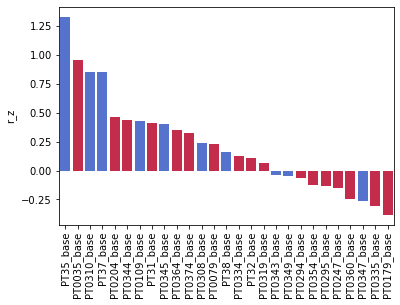

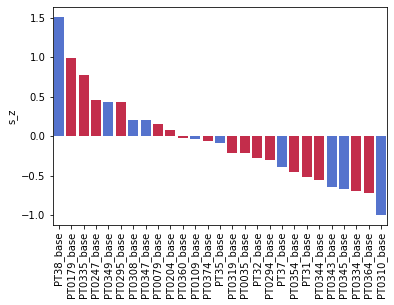

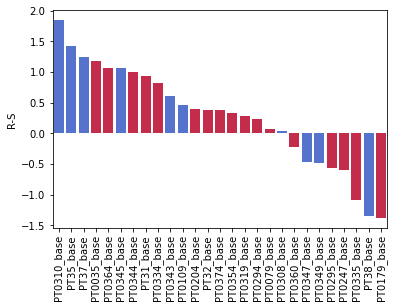

In [106]:
# base, R sig
tmp = TEC_result[TEC_result['time'] == 'base'].sort_values(by='r_z', ascending=False)
sns.barplot(x=tmp.index, y='r_z', palette=tmp['response_color'],
            data=tmp)
plt.xticks(rotation=90)
plt.show()

# base, S sig
tmp = TEC_result[TEC_result['time'] == 'base'].sort_values(by='s_z', ascending=False)
sns.barplot(x=tmp.index, y='s_z', palette=tmp['response_color'],
            data=tmp)
plt.xticks(rotation=90)
plt.show()

# base, R - S sig
tmp = TEC_result[TEC_result['time'] == 'base'].sort_values(by='R-S', ascending=False)
sns.barplot(x=tmp.index, y='R-S', palette=tmp['response_color'],
            data=tmp)
plt.xticks(rotation=90)
fig = plt.gcf()
fig.savefig(panel_home + 'waterfall_ppre_nature_cancer_RS.pdf', transparent=True)

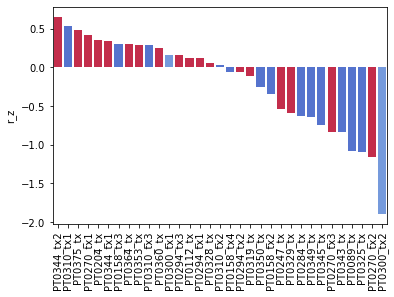

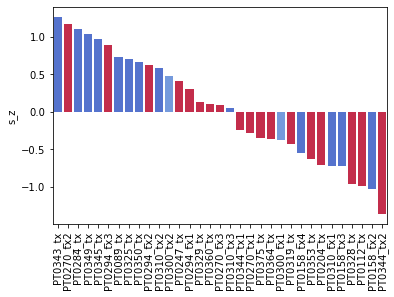

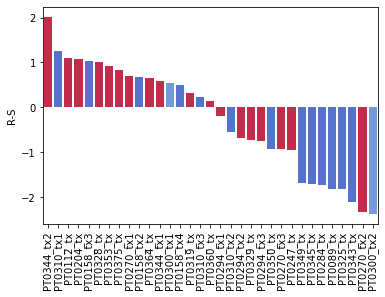

In [105]:
# post, R sig
tmp = TEC_result[TEC_result['time'] == 'tx'].sort_values(by='r_z', ascending=False)
sns.barplot(x=tmp.index, y='r_z', palette=tmp['response_color'],
            data=tmp)
plt.xticks(rotation=90)
plt.show()

# post, S sig
tmp = TEC_result[TEC_result['time'] == 'tx'].sort_values(by='s_z', ascending=False)
sns.barplot(x=tmp.index, y='s_z', palette=tmp['response_color'],
            data=tmp)
plt.xticks(rotation=90)
plt.show()

# post, R - S sig
tmp = TEC_result[TEC_result['time'] == 'tx'].sort_values(by='R-S', ascending=False)
sns.barplot(x=tmp.index, y='R-S', palette=tmp['response_color'],
            data=tmp)
plt.xticks(rotation=90)
fig = plt.gcf()
fig.savefig(panel_home + 'waterfall_post_nature_cancer_RS.pdf', transparent=True)

In [23]:
TEC_result['response_binary'] = 0
for p in TEC_result.index:
    if TEC_result.loc[p, 'response_color'] in ['crimson']:
        TEC_result.at[p, 'response_binary'] = 1

base
0.3882352941176471
tx
0.6888888888888889


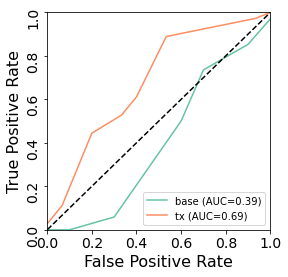

In [24]:
# R - S
plt.figure(figsize=(4, 4))
sns.set_palette('Set2')
for t in ['base', 'tx']:
    print(t)
    tmp = TEC_result[TEC_result['time'] == t]
    fpr_tmp, tpr_tmp, _ = roc_curve(tmp['response_binary'], tmp['R-S'], pos_label=1)

    print(auc(fpr_tmp, tpr_tmp))
    g = sns.lineplot(x=fpr_tmp,
                     y=tpr_tmp,
                     ci=None,
                     label=t + ' (AUC=' + str(np.round(auc(fpr_tmp, tpr_tmp), 2)) + ')')


# add x=y
x0, x1 = g.get_xlim()
y0, y1 = g.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.plot(lims, lims, '--k')

# add labels
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.yticks(rotation=90, fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + 'AUC_nature_cancer_RS.pdf', transparent=True)
fig.savefig(panel_home + 'AUC_nature_cancer_RS.png', dpi=300, transparent=True)

base
0.3352941176470588
tx
0.7037037037037037


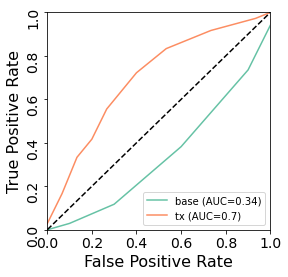

In [25]:
# R
plt.figure(figsize=(4, 4))
sns.set_palette('Set2')
for t in ['base', 'tx']:
    print(t)
    tmp = TEC_result[TEC_result['time'] == t]
    fpr_tmp, tpr_tmp, _ = roc_curve(tmp['response_binary'], tmp['r_z'], pos_label=1)

    print(auc(fpr_tmp, tpr_tmp))
    g = sns.lineplot(x=fpr_tmp,
                     y=tpr_tmp,
                     ci=None,
                     label=t + ' (AUC=' + str(np.round(auc(fpr_tmp, tpr_tmp), 2)) + ')')


# add x=y
x0, x1 = g.get_xlim()
y0, y1 = g.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.plot(lims, lims, '--k')

# add labels
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.yticks(rotation=90, fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + 'AUC_nature_cancer_R.pdf', transparent=True)
fig.savefig(panel_home + 'AUC_nature_cancer_R.png', dpi=300, transparent=True)

base
0.5
tx
0.35185185185185186


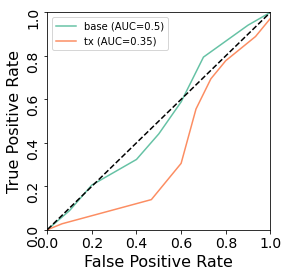

In [26]:
# S
plt.figure(figsize=(4, 4))
sns.set_palette('Set2')
for t in ['base', 'tx']:
    print(t)
    tmp = TEC_result[TEC_result['time'] == t]
    fpr_tmp, tpr_tmp, _ = roc_curve(tmp['response_binary'], tmp['s_z'], pos_label=1)

    print(auc(fpr_tmp, tpr_tmp))
    g = sns.lineplot(x=fpr_tmp,
                     y=tpr_tmp,
                     ci=None,
                     label=t + ' (AUC=' + str(np.round(auc(fpr_tmp, tpr_tmp), 2)) + ')')


# add x=y
x0, x1 = g.get_xlim()
y0, y1 = g.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.plot(lims, lims, '--k')

# add labels
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.yticks(rotation=90, fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + 'AUC_nature_cancer_S.pdf', transparent=True)
fig.savefig(panel_home + 'AUC_nature_cancer_S.png', dpi=300, transparent=True)

# GSEA on 56_merged

In [27]:
gabris_56.columns

Index(['Gene Name', 'Reference', 'Strand', 'Start', 'End',
       'B16_IFNG-KO62_IFNg_1', 'B16_IFNG-KO62_IFNg_2', 'B16_IFNG-KO62_IFNg_3',
       'B16_IFNG-KO62_media_1', 'B16_IFNG-KO62_media_2',
       'B16_IFNG-KO62_media_3', 'B16_IFNG-WT_IFNg_1', 'B16_IFNG-WT_IFNg_2',
       'B16_IFNG-WT_IFNg_3', 'B16_IFNG-WT_media_1', 'B16_IFNG-WT_media_2',
       'B16_IFNG-WT_media_3', 'B16_TNF_WNT3A-KO62_TNFa_1',
       'B16_TNF_WNT3A-KO62_Wnt3a_1', 'B16_TNF_WNT3A-KO62_media_1',
       'B16_TNF_WNT3A-KO81_TNFa_1', 'B16_TNF_WNT3A-KO81_Wnt3a_1',
       'B16_TNF_WNT3A-KO81_media_1', 'B16_TNF_WNT3A-KO82_TNFa_1',
       'B16_TNF_WNT3A-KO82_Wnt3a_1', 'B16_TNF_WNT3A-KO82_media_1',
       'B16_TNF_WNT3A-WTCC_TNFa_1', 'B16_TNF_WNT3A-WTCC_Wnt3a_1',
       'B16_TNF_WNT3A-WTCC_media_1',
       'B16_WNT3A_additional_samples-WTCC_Wnt3a_2',
       'B16_WNT3A_additional_samples-WTCC_Wnt3a_3',
       'B16_WNT3A_additional_samples-WTCC_media_2',
       'B16_WNT3A_additional_samples-WTCC_media_3',
       'B16_invivo

In [28]:
gabris_56_gn = gabris_56.set_index('Gene Name')
gabris_56_gn = gabris_56_gn.drop(['Reference', 'Strand', 'Start', 'End'], axis=1)

In [29]:
gabris_56_gn = gabris_56_gn.dropna(axis=0, how='any')
gabris_56_gn.shape

(54525, 56)

In [30]:
gabris_56_gn.describe()

,B16_IFNG-KO62_IFNg_1,B16_IFNG-KO62_IFNg_2,B16_IFNG-KO62_IFNg_3,B16_IFNG-KO62_media_1,B16_IFNG-KO62_media_2,B16_IFNG-KO62_media_3,B16_IFNG-WT_IFNg_1,B16_IFNG-WT_IFNg_2,B16_IFNG-WT_IFNg_3,B16_IFNG-WT_media_1,...,B16_invivo_last-KO62_anti-PD-1_3,B16_invivo_last-KO62_anti-PD-1_4,B16_invivo_last-WT_Isotype_1,B16_invivo_last-WT_Isotype_2,B16_invivo_last-WT_Isotype_3,B16_invivo_last-WT_Isotype_4,B16_invivo_last-WT_anti-PD-1_1,B16_invivo_last-WT_anti-PD-1_2,B16_invivo_last-WT_anti-PD-1_3,B16_invivo_last-WT_anti-PD-1_4
count,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,...,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000
mean,8.421125,8.702909,8.527390,8.568978,8.548426,8.471436,8.629800,8.711277,8.668498,8.580869,...,10.667374,10.931958,16.244849,14.499105,13.356098,12.527262,13.327355,13.769515,9.292004,12.747007
std,59.353809,63.376197,60.627666,63.522949,63.957710,63.407587,61.367614,61.967373,62.535358,66.172424,...,92.816469,87.435114,180.996919,295.499116,124.407172,111.984077,125.613203,143.591665,82.914312,114.239521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.617019,0.649277,0.633066,0.604838,0.616404,0.591826,0.631904,0.644324,0.658798,0.607353,...,1.004085,0.819893,0.547382,0.404096,0.605278,0.804186,0.713865,0.671086,0.970802,0.761131
max,5084.893555,5648.734375,5382.224121,6613.911621,6549.225098,6635.964355,6270.150879,5720.910645,6265.367676,7889.336426,...,6267.184570,4989.914551,14295.620117,57660.035156,7838.920410,10946.334961,9051.995117,14962.666016,7167.714355,8874.255859


In [31]:
gabris_56_norm = np.log2(gabris_56_gn + 1)

In [61]:
gabris_56_norm.describe()

,B16_IFNG-KO62_IFNg_1,B16_IFNG-KO62_IFNg_2,B16_IFNG-KO62_IFNg_3,B16_IFNG-KO62_media_1,B16_IFNG-KO62_media_2,B16_IFNG-KO62_media_3,B16_IFNG-WT_IFNg_1,B16_IFNG-WT_IFNg_2,B16_IFNG-WT_IFNg_3,B16_IFNG-WT_media_1,...,B16_invivo_last-KO62_anti-PD-1_3,B16_invivo_last-KO62_anti-PD-1_4,B16_invivo_last-WT_Isotype_1,B16_invivo_last-WT_Isotype_2,B16_invivo_last-WT_Isotype_3,B16_invivo_last-WT_Isotype_4,B16_invivo_last-WT_anti-PD-1_1,B16_invivo_last-WT_anti-PD-1_2,B16_invivo_last-WT_anti-PD-1_3,B16_invivo_last-WT_anti-PD-1_4
count,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,...,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000,54525.000000
mean,0.951921,0.956625,0.952370,0.953014,0.954455,0.951817,0.958447,0.960034,0.961475,0.954726,...,0.981988,0.965895,0.858449,0.836459,0.910756,0.958433,0.936627,0.922338,0.980767,0.952166
std,1.831316,1.836887,1.833027,1.838497,1.838123,1.834482,1.841931,1.842586,1.843492,1.839320,...,1.851351,1.864500,1.830370,1.803626,1.858931,1.873371,1.865869,1.860693,1.827957,1.875184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.693337,0.721834,0.707583,0.682428,0.692788,0.670683,0.706556,0.717495,0.730138,0.684687,...,1.002944,0.863854,0.629829,0.489642,0.682823,0.851348,0.777253,0.740786,0.978783,0.816502
max,12.312286,12.463967,12.394255,12.691506,12.677329,12.696308,12.614515,12.482281,12.613414,12.945871,...,12.613832,12.285088,13.803386,15.815309,12.936623,13.418292,13.144179,13.869176,12.807499,13.115573


In [74]:
"""for c in gabris_56_norm.columns:
    tmp_result = df(gabris_56_norm[c]).sort_values(by=c, ascending=False)
    tmp_result = (tmp_result - tmp_result.mean())/tmp_result.std()
    tmp_gsea = gp.prerank(tmp_result,
                          gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                          processes=20,
                          permutation_num=100,
                          outdir=None, seed=0, min_size=10, max_size=2000)
    print(tmp_gsea.res2d['nes'])
    sys.exit(0)"""

2023-05-05 01:01:01,113 Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!


Term
GOBP_ACETYL_COA_METABOLIC_PROCESS                       2.310285
GOBP_ACTIN_FILAMENT_BUNDLE_ORGANIZATION                 2.363447
GOBP_ACTIN_FILAMENT_DEPOLYMERIZATION                    2.505326
GOBP_ACTIN_FILAMENT_ORGANIZATION                        2.304513
GOBP_ACTIN_NUCLEATION                                   2.552744
                                                          ...   
GOBP_RENAL_SODIUM_ION_ABSORPTION                       -0.554461
GOBP_REGULATION_OF_GAP_JUNCTION_ASSEMBLY               -0.673450
GOBP_REGULATION_OF_ACROSOME_REACTION                   -0.654048
GOBP_DISTAL_TUBULE_DEVELOPMENT                         -0.659123
GOBP_REGULATION_OF_BLOOD_VOLUME_BY_RENIN_ANGIOTENSIN   -0.556205
Name: nes, Length: 5662, dtype: float64


SystemExit: 0

/home/dyang-server/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [76]:
# tmp_gsea.res2d['nes'].describe()

count    5662.000000
mean             inf
std              NaN
min        -3.888910
25%         1.538953
50%         1.889428
75%         2.188125
max              inf
Name: nes, dtype: float64

In [78]:
# tmp_gsea.res2d['nes'].loc['GOBP_AUTOPHAGY_OF_MITOCHONDRION']

2.6753725095802534

In [81]:
# tmp_gsea.res2d.sort_values(by='nes', ascending=False)[:30]

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
GOBP_EPOXYGENASE_P450_PATHWAY,-0.426106,inf,NaN,0.0,45,45,Cyp2j6;Cyp2j9;Cyp2t4;Cyp2j13;Cyp4a10;Cyp4a31;C...,Cyp2j11;Cyp4a12b;Cyp4a14;Cyp2j7;Cyp4a12a;Cyp2j...
GOBP_SENSORY_PERCEPTION_OF_TASTE,-0.268420,inf,NaN,0.0,72,72,Gnb1;Car6;Rtp4;Asic1;Trpm5;Azgp1;Lef1;Gnat2;It...,Gnat3;Tas2r116;Tas2r140;Tas2r135;Tas2r120;Tas2...
GOBP_RESPONSE_TO_PHEROMONE,-0.501464,inf,NaN,0.0,107,107,Gpr180;Gng8;Vmn1r32;Tmem145;Vmn1r4;Vmn2r1;Vmn1...,Vmn1r21;Vmn1r35;Vmn1r5;Vmn1r23;Vmn1r24;Vmn1r81...
GOBP_ORGAN_OR_TISSUE_SPECIFIC_IMMUNE_RESPONSE,-0.269310,inf,NaN,0.0,70,63,Fau;Rpl39;Otud7b;Trex1;Il4;Rab17;Camp;Cd160;If...,Pla2g1b;Rnase2b;Defa28;Defa20;Ear2;Gp2;Defb9;D...
GOBP_PROTON_MOTIVE_FORCE_DRIVEN_ATP_SYNTHESIS,0.933067,3.095130,0.0,0.0,70,66,mt-Atp6;mt-Nd1;mt-Atp8;Atp5b;Atp5g3;mt-Nd2;mt-...,mt-Atp6;mt-Nd1;mt-Atp8;Atp5b;Atp5g3;mt-Nd2;mt-...
GOBP_TRANSLATION_AT_SYNAPSE,0.976183,3.058525,0.0,0.0,48,48,Rpl8;Eef2;Rpl32;Rpl36;Rplp2;Rpl4;Rpl26;Rpl13a;...,Rpl8;Eef2;Rpl32;Rpl36;Rplp2;Rpl4;Rpl26;Rpl13a;...
GOBP_CYTOPLASMIC_TRANSLATION,0.858327,2.885927,0.0,0.0,146,146,Rplp1;Rpl8;Pkm;Eef2;Rpl32;Rpl36;Rplp2;Rpl4;Rps...,Rplp1;Rpl8;Pkm;Eef2;Rpl32;Rpl36;Rplp2;Rpl4;Rps...
GOBP_ATP_BIOSYNTHETIC_PROCESS,0.867078,2.838312,0.0,0.0,104,99,mt-Atp6;Pkm;Aldoa;Eno1;mt-Nd1;mt-Atp8;Atp5b;mt...,mt-Atp6;Pkm;Aldoa;Eno1;mt-Nd1;mt-Atp8;Atp5b;mt...
GOBP_OXIDATIVE_PHOSPHORYLATION,0.825079,2.812247,0.0,0.0,145,139,mt-Atp6;mt-Co1;mt-Nd1;mt-Atp8;mt-Cytb;mt-Co3;A...,mt-Atp6;mt-Co1;mt-Nd1;mt-Atp8;mt-Cytb;mt-Co3;A...


In [82]:
"""# GSEA on 56 columns
gobp_nes = df(columns=gabris_56_norm.columns)
gobp_fdr = df(columns=gabris_56_norm.columns)


for c in gabris_56_norm.columns:
    tmp_result = df(gabris_56_norm[c]).sort_values(by=c, ascending=False)
    tmp_result = (tmp_result - tmp_result.mean())/tmp_result.std()
    tmp_gsea = gp.prerank(tmp_result,
                          gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                          processes=24,
                          permutation_num=100,
                          outdir=None, seed=0, min_size=10, max_size=2000)
    gobp_nes[c] = tmp_gsea.res2d['nes']
    gobp_fdr[c] = tmp_gsea.res2d['fdr']"""

2023-05-05 01:21:31,227 Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-05-05 01:33:20,860 Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-05-05 01:45:12,807 Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-05-05 01:57:12,798 Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-05-05 02:08:58,451 Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-05-05 02:20:53,983 Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-05-05 02:32:47,150 Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-05-05 02:44:43,093 Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-05-05 02:56:35,980 Input gene rankings contains duplicated IDs, Onl

In [83]:
# gobp_nes.to_csv(result_home + 'gsea_gobp_nes.csv', sep=',')
# gobp_fdr.to_csv(result_home + 'gsea_gobp_fdr.csv', sep=',')

In [84]:
# gobp_nes.loc['GOBP_AUTOPHAGY_OF_MITOCHONDRION']

B16_IFNG-KO62_IFNg_1                         2.675373
B16_IFNG-KO62_IFNg_2                         2.670696
B16_IFNG-KO62_IFNg_3                         2.538834
B16_IFNG-KO62_media_1                        2.514797
B16_IFNG-KO62_media_2                        2.662299
B16_IFNG-KO62_media_3                        2.650748
B16_IFNG-WT_IFNg_1                           2.519225
B16_IFNG-WT_IFNg_2                           2.674383
B16_IFNG-WT_IFNg_3                           2.660818
B16_IFNG-WT_media_1                          2.596243
B16_IFNG-WT_media_2                          2.610206
B16_IFNG-WT_media_3                          2.547492
B16_TNF_WNT3A-KO62_TNFa_1                    2.667205
B16_TNF_WNT3A-KO62_Wnt3a_1                   2.700733
B16_TNF_WNT3A-KO62_media_1                   2.554686
B16_TNF_WNT3A-KO81_TNFa_1                    2.798127
B16_TNF_WNT3A-KO81_Wnt3a_1                   2.662871
B16_TNF_WNT3A-KO81_media_1                   2.608169
B16_TNF_WNT3A-KO82_TNFa_1   

In [85]:
# gobp_fdr.loc['GOBP_AUTOPHAGY_OF_MITOCHONDRION']

B16_IFNG-KO62_IFNg_1                         0.0
B16_IFNG-KO62_IFNg_2                         0.0
B16_IFNG-KO62_IFNg_3                         0.0
B16_IFNG-KO62_media_1                        0.0
B16_IFNG-KO62_media_2                        0.0
B16_IFNG-KO62_media_3                        0.0
B16_IFNG-WT_IFNg_1                           0.0
B16_IFNG-WT_IFNg_2                           0.0
B16_IFNG-WT_IFNg_3                           0.0
B16_IFNG-WT_media_1                          0.0
B16_IFNG-WT_media_2                          0.0
B16_IFNG-WT_media_3                          0.0
B16_TNF_WNT3A-KO62_TNFa_1                    0.0
B16_TNF_WNT3A-KO62_Wnt3a_1                   0.0
B16_TNF_WNT3A-KO62_media_1                   0.0
B16_TNF_WNT3A-KO81_TNFa_1                    0.0
B16_TNF_WNT3A-KO81_Wnt3a_1                   0.0
B16_TNF_WNT3A-KO81_media_1                   0.0
B16_TNF_WNT3A-KO82_TNFa_1                    0.0
B16_TNF_WNT3A-KO82_Wnt3a_1                   0.0
B16_TNF_WNT3A-KO82_m

In [86]:
# gobp_nes.loc['GOBP_AUTOPHAGOSOME_ORGANIZATION']

B16_IFNG-KO62_IFNg_1                         2.698777
B16_IFNG-KO62_IFNg_2                         2.737735
B16_IFNG-KO62_IFNg_3                         2.696559
B16_IFNG-KO62_media_1                        2.592988
B16_IFNG-KO62_media_2                        2.582536
B16_IFNG-KO62_media_3                        2.640830
B16_IFNG-WT_IFNg_1                           2.688189
B16_IFNG-WT_IFNg_2                           2.665402
B16_IFNG-WT_IFNg_3                           2.682799
B16_IFNG-WT_media_1                          2.710681
B16_IFNG-WT_media_2                          2.640990
B16_IFNG-WT_media_3                          2.626171
B16_TNF_WNT3A-KO62_TNFa_1                    2.624583
B16_TNF_WNT3A-KO62_Wnt3a_1                   2.544583
B16_TNF_WNT3A-KO62_media_1                   2.722289
B16_TNF_WNT3A-KO81_TNFa_1                    2.814062
B16_TNF_WNT3A-KO81_Wnt3a_1                   2.601012
B16_TNF_WNT3A-KO81_media_1                   2.644910
B16_TNF_WNT3A-KO82_TNFa_1   

In [87]:
# gobp_nes.describe()

,B16_IFNG-KO62_IFNg_1,B16_IFNG-KO62_IFNg_2,B16_IFNG-KO62_IFNg_3,B16_IFNG-KO62_media_1,B16_IFNG-KO62_media_2,B16_IFNG-KO62_media_3,B16_IFNG-WT_IFNg_1,B16_IFNG-WT_IFNg_2,B16_IFNG-WT_IFNg_3,B16_IFNG-WT_media_1,...,B16_invivo_last-KO62_anti-PD-1_3,B16_invivo_last-KO62_anti-PD-1_4,B16_invivo_last-WT_Isotype_1,B16_invivo_last-WT_Isotype_2,B16_invivo_last-WT_Isotype_3,B16_invivo_last-WT_Isotype_4,B16_invivo_last-WT_anti-PD-1_1,B16_invivo_last-WT_anti-PD-1_2,B16_invivo_last-WT_anti-PD-1_3,B16_invivo_last-WT_anti-PD-1_4
count,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,...,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000
mean,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-3.888910,-3.912224,-4.049797,-3.560493,-3.347459,-3.738657,-5.331694,-3.770166,-4.367031,-4.241497,...,-3.965601,-3.726485,-2.944254,-3.112678,-3.225360,-3.405062,-4.559498,-3.194023,-3.787443,-4.158703
25%,1.538953,1.528387,1.538472,1.502152,1.506689,1.507465,1.545795,1.532966,1.530770,1.508982,...,1.714643,1.608577,1.277226,1.361631,1.465092,1.566750,1.517214,1.488253,1.730549,1.557114
50%,1.889428,1.884571,1.884140,1.867529,1.876554,1.873913,1.893363,1.889731,1.887663,1.879774,...,2.027155,1.936354,1.640706,1.717200,1.812666,1.906933,1.888172,1.833916,2.032201,1.909302
75%,2.188125,2.186016,2.187384,2.177063,2.180266,2.179460,2.188618,2.186284,2.187692,2.186633,...,2.277941,2.207378,1.955025,2.010449,2.087762,2.167377,2.143553,2.107642,2.285005,2.168873
max,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [88]:
# gobp_fdr.describe()

,B16_IFNG-KO62_IFNg_1,B16_IFNG-KO62_IFNg_2,B16_IFNG-KO62_IFNg_3,B16_IFNG-KO62_media_1,B16_IFNG-KO62_media_2,B16_IFNG-KO62_media_3,B16_IFNG-WT_IFNg_1,B16_IFNG-WT_IFNg_2,B16_IFNG-WT_IFNg_3,B16_IFNG-WT_media_1,...,B16_invivo_last-KO62_anti-PD-1_3,B16_invivo_last-KO62_anti-PD-1_4,B16_invivo_last-WT_Isotype_1,B16_invivo_last-WT_Isotype_2,B16_invivo_last-WT_Isotype_3,B16_invivo_last-WT_Isotype_4,B16_invivo_last-WT_anti-PD-1_1,B16_invivo_last-WT_anti-PD-1_2,B16_invivo_last-WT_anti-PD-1_3,B16_invivo_last-WT_anti-PD-1_4
count,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,...,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000
mean,0.090226,0.091565,0.090248,0.095838,0.094643,0.095511,0.089606,0.091075,0.090475,0.094700,...,0.051890,0.070072,0.171428,0.140681,0.105964,0.079393,0.092281,0.101450,0.049457,0.084753
std,0.212100,0.213247,0.212380,0.216676,0.214162,0.216047,0.212457,0.213786,0.211561,0.214171,...,0.158331,0.183716,0.277078,0.258142,0.224594,0.193755,0.210911,0.221674,0.153037,0.204699
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000036,0.000020,0.000000,0.000007,0.000000,0.000015,0.000014,0.000014,0.000000,0.000029,...,0.000000,0.000007,0.000660,0.000218,0.000086,0.000000,0.000035,0.000047,0.000000,0.000010
50%,0.001315,0.001446,0.001371,0.001711,0.001511,0.001480,0.001134,0.001197,0.001240,0.001432,...,0.000155,0.000685,0.025239,0.011449,0.003919,0.001047,0.001462,0.002874,0.000143,0.001115
75%,0.039066,0.042410,0.038052,0.048445,0.048507,0.049461,0.036500,0.040067,0.041410,0.047251,...,0.008670,0.023285,0.209741,0.132015,0.069555,0.033168,0.048231,0.059902,0.007152,0.036230
max,1.000000,0.994052,1.000000,1.000000,0.996360,1.000000,0.997918,1.000000,1.000000,0.996573,...,0.997507,0.995243,1.000000,1.000000,1.000000,0.998407,0.999868,1.000000,1.000000,1.000000


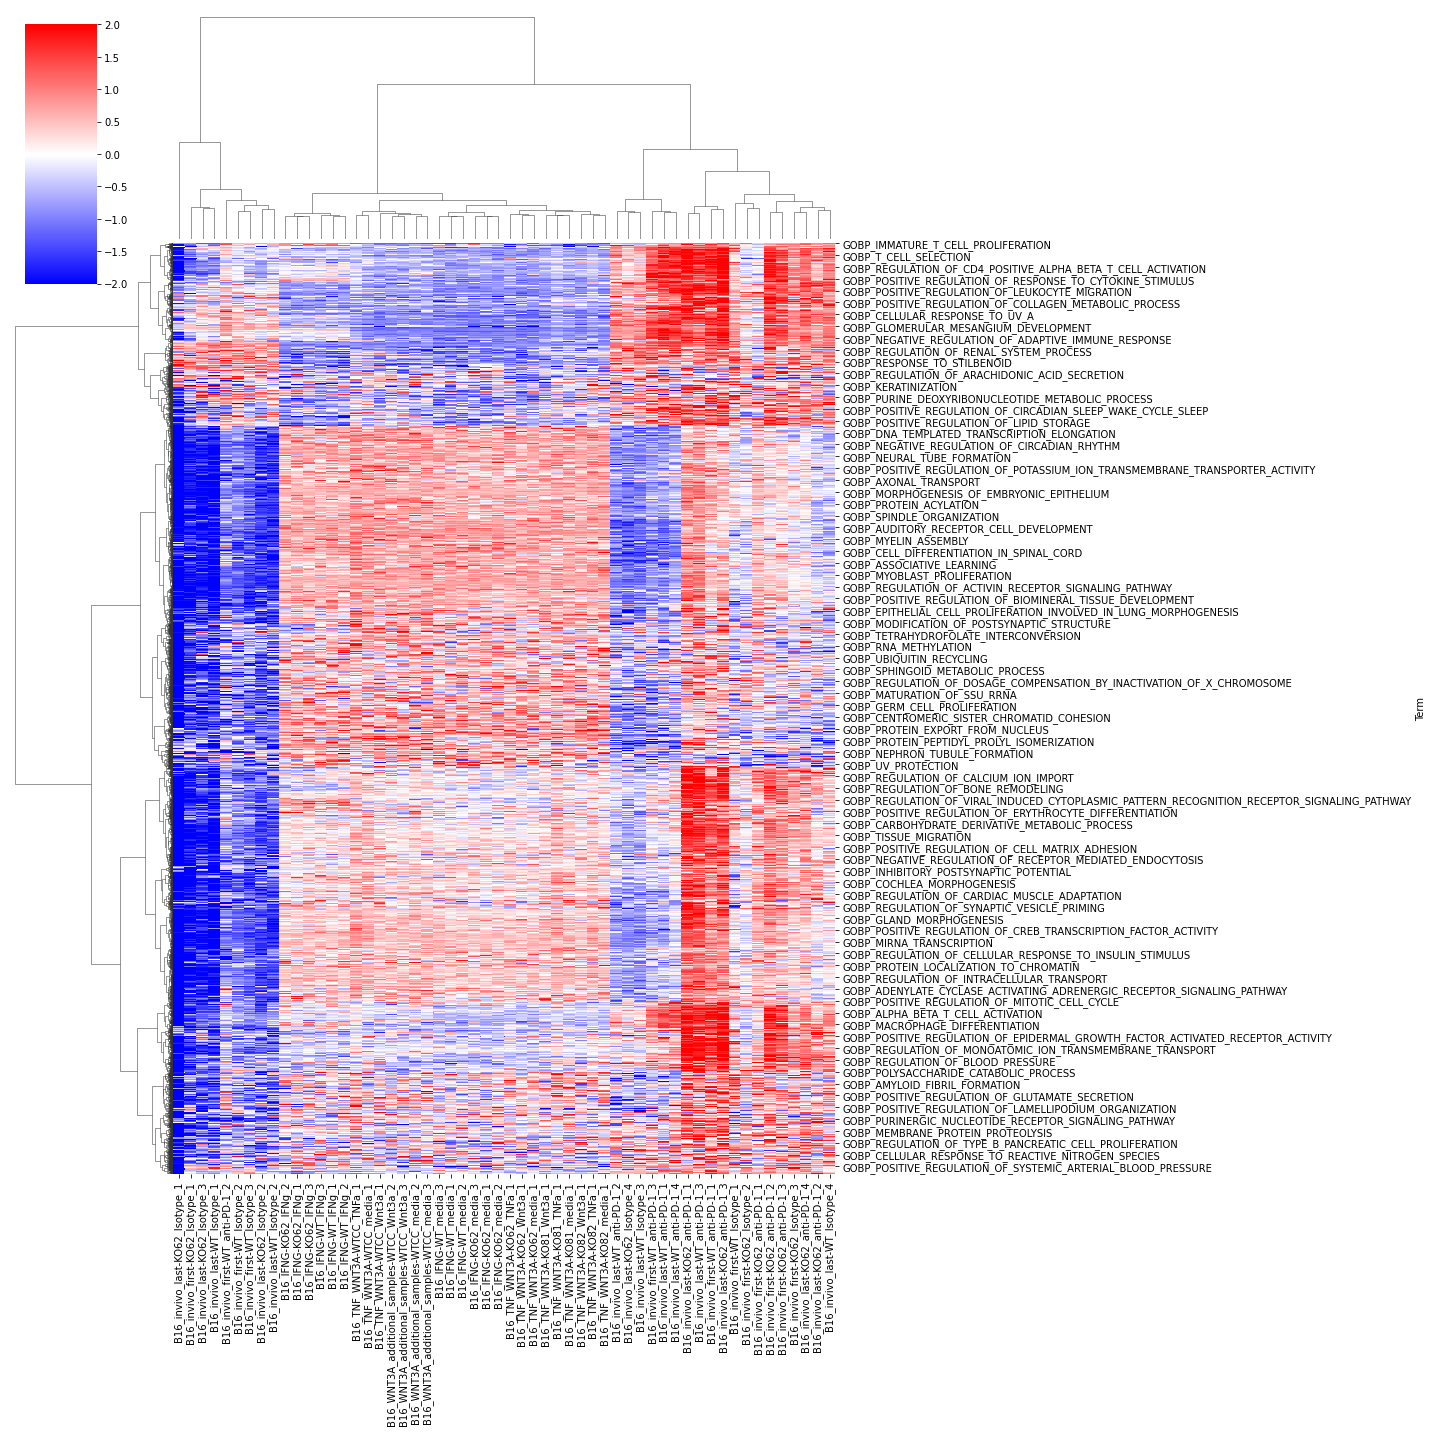

In [103]:
'''
sns.clustermap(gobp_nes.fillna(0), figsize=(20, 20),
               vmin=-2, vmax=2, z_score=0, cmap='bwr', method='ward')
'''


# DEG on 56_merged

In [49]:
# remove all zero
gabris_56_tmp = gabris_56_norm[gabris_56_norm > 0.].dropna(axis=0, how='all').fillna(0)
gabris_56_tmp = gabris_56_tmp.groupby(level=0).mean()
gabris_56_final = gabris_56_tmp.copy()

In [50]:
gabris_56_final

,B16_IFNG-KO62_IFNg_1,B16_IFNG-KO62_IFNg_2,B16_IFNG-KO62_IFNg_3,B16_IFNG-KO62_media_1,B16_IFNG-KO62_media_2,B16_IFNG-KO62_media_3,B16_IFNG-WT_IFNg_1,B16_IFNG-WT_IFNg_2,B16_IFNG-WT_IFNg_3,B16_IFNG-WT_media_1,...,B16_invivo_last-KO62_anti-PD-1_3,B16_invivo_last-KO62_anti-PD-1_4,B16_invivo_last-WT_Isotype_1,B16_invivo_last-WT_Isotype_2,B16_invivo_last-WT_Isotype_3,B16_invivo_last-WT_Isotype_4,B16_invivo_last-WT_anti-PD-1_1,B16_invivo_last-WT_anti-PD-1_2,B16_invivo_last-WT_anti-PD-1_3,B16_invivo_last-WT_anti-PD-1_4
Gene Name,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0.024030,0.074660,0.042635,0.000000,0.056271,0.069235,0.124900,0.102082,0.085835,0.028945,...,0.076098,0.044139,0.361869,0.000000,0.000000,0.108073,0.254391,0.119921,0.070913,0.028959
0610006L08Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.733201,0.033790,0.000000,0.071023,0.056135,0.130808,0.000000,0.026082
0610009B22Rik,4.158697,4.353643,4.312435,4.343187,4.312529,4.282056,4.204739,4.190057,4.231137,4.238873,...,4.023395,4.318211,5.917946,4.421795,4.482773,4.536282,4.809265,4.481282,3.846860,4.614417
0610009E02Rik,0.065815,0.136130,0.166676,0.182062,0.095922,0.291283,0.406344,0.368602,0.317918,0.077999,...,0.850902,0.184586,0.997912,0.000000,0.000000,0.187715,0.299426,1.278473,0.202978,1.057928
0610009L18Rik,1.595255,1.466837,1.351756,1.603839,1.591039,1.068076,1.147210,1.046084,1.280230,0.957009,...,2.031759,2.521725,3.152114,1.694204,1.294159,2.641131,1.652379,2.753826,1.432590,2.138715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n-R5s93,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n-R5s96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.249749,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n-R5s97,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127207,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [51]:
sample_info.head()

,Model,PAK4,Treatment,System,Day collection (invivo)
Sample,,,,,
B16_IFNG-KO62_IFNg_1,B16,KO,IFNg,In vitro,NaN
B16_IFNG-KO62_IFNg_2,B16,KO,IFNg,In vitro,NaN
B16_IFNG-KO62_IFNg_3,B16,KO,IFNg,In vitro,NaN
B16_IFNG-KO62_media_1,B16,KO,Media,In vitro,NaN
B16_IFNG-KO62_media_2,B16,KO,Media,In vitro,NaN


In [52]:
s_invitro = sample_info[sample_info['System'] == 'In vitro']
s_invivo = sample_info[sample_info['System'] == 'In vivo']
print(s_invitro.shape)
print(s_invivo.shape)

(28, 5)
(28, 5)


In [84]:
s_invivo

,Model,PAK4,Treatment,System,Day collection (invivo)
Sample,,,,,
B16_invivo_first-KO62_Isotype_1,B16,KO,Isotype,In vivo,Day 6
B16_invivo_first-KO62_Isotype_2,B16,KO,Isotype,In vivo,Day 6
B16_invivo_first-KO62_Isotype_3,B16,KO,Isotype,In vivo,Day 6
B16_invivo_first-KO62_anti-PD-1_1,B16,KO,anti-PD1,In vivo,Day 6
B16_invivo_first-KO62_anti-PD-1_2,B16,KO,anti-PD1,In vivo,Day 6
B16_invivo_first-KO62_anti-PD-1_3,B16,KO,anti-PD1,In vivo,Day 6
B16_invivo_first-WT_Isotype_1,B16,WT,Isotype,In vivo,Day 6
B16_invivo_first-WT_Isotype_2,B16,WT,Isotype,In vivo,Day 6
B16_invivo_first-WT_Isotype_3,B16,WT,Isotype,In vivo,Day 6


In [53]:
pak4ko = s_invitro[:12]
pak4ko

,Model,PAK4,Treatment,System,Day collection (invivo)
Sample,,,,,
B16_IFNG-KO62_IFNg_1,B16,KO,IFNg,In vitro,NaN
B16_IFNG-KO62_IFNg_2,B16,KO,IFNg,In vitro,NaN
B16_IFNG-KO62_IFNg_3,B16,KO,IFNg,In vitro,NaN
B16_IFNG-KO62_media_1,B16,KO,Media,In vitro,NaN
B16_IFNG-KO62_media_2,B16,KO,Media,In vitro,NaN
B16_IFNG-KO62_media_3,B16,KO,Media,In vitro,NaN
B16_IFNG-WT_IFNg_1,B16,WT,IFNg,In vitro,NaN
B16_IFNG-WT_IFNg_2,B16,WT,IFNg,In vitro,NaN
B16_IFNG-WT_IFNg_3,B16,WT,IFNg,In vitro,NaN


In [361]:
s_invitro

,Model,PAK4,Treatment,System,Day collection (invivo)
Sample,,,,,
B16_IFNG-KO62_IFNg_1,B16,KO,IFNg,In vitro,NaN
B16_IFNG-KO62_IFNg_2,B16,KO,IFNg,In vitro,NaN
B16_IFNG-KO62_IFNg_3,B16,KO,IFNg,In vitro,NaN
B16_IFNG-KO62_media_1,B16,KO,Media,In vitro,NaN
B16_IFNG-KO62_media_2,B16,KO,Media,In vitro,NaN
B16_IFNG-KO62_media_3,B16,KO,Media,In vitro,NaN
B16_IFNG-WT_IFNg_1,B16,WT,IFNg,In vitro,NaN
B16_IFNG-WT_IFNg_2,B16,WT,IFNg,In vitro,NaN
B16_IFNG-WT_IFNg_3,B16,WT,IFNg,In vitro,NaN


In [54]:
def deg(expr_matrix, group_tr, group_ct):
    result = df(index=expr_matrix.index, columns=['log2fc(tr-ct)', 'mean_tr', 'mean_ct',
                                                  't_stat', 't_p', 't_log10p'])
    tmp_tr = expr_matrix[group_tr]
    tmp_ct = expr_matrix[group_ct]
    
    for g in expr_matrix.index:
        result.at[g, 'mean_tr'] = tmp_tr.loc[g, :].mean()
        result.at[g, 'mean_ct'] = tmp_ct.loc[g, :].mean()
        result.at[g, 'log2fc(tr-ct)'] = result.loc[g, 'mean_tr'] - result.loc[g, 'mean_ct']
        result.at[g, 't_stat'], result.at[g, 't_p'] = stats.ttest_ind(tmp_tr.loc[g, :], tmp_ct.loc[g, :], equal_var=False)
        result.at[g, 't_log10p'] = -np.log10(float(result.loc[g, 't_p']))

    return result 

In [251]:
# PAK4 KO vs WT: Media
tmp_sample = sample_info[sample_info['Treatment'] == 'Media'][:6]
pak4_media = deg(expr_matrix=gabris_56_final,
                 group_tr=tmp_sample[tmp_sample['PAK4'] == 'KO'].index,
                 group_ct=tmp_sample[tmp_sample['PAK4'] == 'WT'].index)

In [56]:
# PAK4 KO vs WT: IFNG
tmp_sample = sample_info[sample_info['Treatment'] == 'IFNg']
pak4_ifng = deg(expr_matrix=gabris_56_final,
                 group_tr=tmp_sample[tmp_sample['PAK4'] == 'KO'].index,
                 group_ct=tmp_sample[tmp_sample['PAK4'] == 'WT'].index)

In [57]:
# PAK4 KO: IFNG vs Media
tmp_sample = sample_info[sample_info['PAK4'] == 'KO']
ifng_pak4ko = deg(expr_matrix=gabris_56_final,
                  group_tr=tmp_sample[tmp_sample['Treatment'] == 'IFNg'].index,
                  group_ct=tmp_sample[tmp_sample['Treatment'] == 'Media'].index)

In [58]:
# PAK4 WT: IFNG vs Media
tmp_sample = sample_info[sample_info['PAK4'] == 'WT']
ifng_pak4wt = deg(expr_matrix=gabris_56_final,
                  group_tr=tmp_sample[tmp_sample['Treatment'] == 'IFNg'].index,
                  group_ct=tmp_sample[tmp_sample['Treatment'] == 'Media'].index)

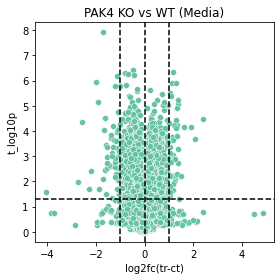

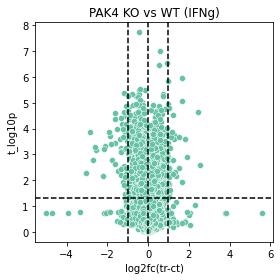

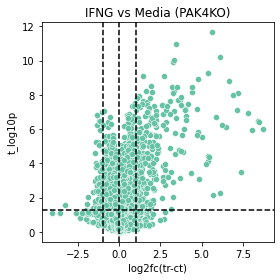

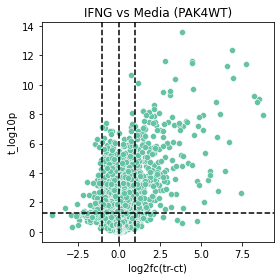

In [252]:
# volcano
plt.figure(figsize=(4, 4))
sns.scatterplot(x='log2fc(tr-ct)', y='t_log10p', data=pak4_media)
plt.axvline(x=-1., ls='--', c='k')
plt.axvline(x=1., ls='--', c='k')
plt.axvline(x=0., ls='--', c='k')
plt.axhline(y=-np.log10(.05), ls='--', c='k')
plt.title('PAK4 KO vs WT (Media)')
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + 'PAK4KO_WT_media_in_vitro.png', dpi=300, transparent=True)

# volcano
plt.figure(figsize=(4, 4))
sns.scatterplot(x='log2fc(tr-ct)', y='t_log10p', data=pak4_ifng)
plt.axvline(x=-1., ls='--', c='k')
plt.axvline(x=1., ls='--', c='k')
plt.axvline(x=0., ls='--', c='k')
plt.axhline(y=-np.log10(.05), ls='--', c='k')
plt.title('PAK4 KO vs WT (IFNg)')
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + 'PAK4KO_WT_IFNG_in_vitro.png', dpi=300, transparent=True)

# volcano
plt.figure(figsize=(4, 4))
sns.scatterplot(x='log2fc(tr-ct)', y='t_log10p', data=ifng_pak4ko)
plt.axvline(x=-1., ls='--', c='k')
plt.axvline(x=1., ls='--', c='k')
plt.axvline(x=0., ls='--', c='k')
plt.axhline(y=-np.log10(.05), ls='--', c='k')
plt.title('IFNG vs Media (PAK4KO)')
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + 'IFNG_media_PAK4KO_in_vitro.png', dpi=300, transparent=True)

# volcano
plt.figure(figsize=(4, 4))
sns.scatterplot(x='log2fc(tr-ct)', y='t_log10p', data=ifng_pak4wt)
plt.axvline(x=-1., ls='--', c='k')
plt.axvline(x=1., ls='--', c='k')
plt.axvline(x=0., ls='--', c='k')
plt.axhline(y=-np.log10(.05), ls='--', c='k')
plt.title('IFNG vs Media (PAK4WT)')
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + 'IFNG_media_PAK4WT_in_vitro.png', dpi=300, transparent=True)

In [254]:
# Pre-rank on FC
pak4_media_gsea = gp.prerank(pak4_media.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),
                             gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                             processes=24,
                             permutation_num=100,
                             outdir=None, seed=0, min_size=10, max_size=2000)

'''
pak4_ifng_gsea = gp.prerank(pak4_ifng.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),
                            gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                            processes=24,
                            permutation_num=100,
                            outdir=None, seed=0, min_size=10, max_size=2000)

ifng_pak4ko_gsea = gp.prerank(ifng_pak4ko.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),
                              gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                              processes=24,
                              permutation_num=100,
                              outdir=None, seed=0, min_size=10, max_size=2000)

ifng_pak4wt_gsea = gp.prerank(ifng_pak4wt.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),
                              gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                              processes=24,
                              permutation_num=100,
                              outdir=None, seed=0, min_size=10, max_size=2000)
'''

"\npak4_ifng_gsea = gp.prerank(pak4_ifng.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),\n                            gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',\n                            processes=24,\n                            permutation_num=100,\n                            outdir=None, seed=0, min_size=10, max_size=2000)\n\nifng_pak4ko_gsea = gp.prerank(ifng_pak4ko.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),\n                              gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',\n                              processes=24,\n                              permutation_num=100,\n                              outdir=None, seed=0, min_size=10, max_size=2000)\n\nifng_pak4wt_gsea = gp.prerank(ifng_pak4wt.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),\n                              gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.

In [183]:
def visual_top(result, top_term, figsize, savepath=None):
    # drop inf
    tmp = result.copy()
    tmp.replace([-np.inf, np.inf], np.nan, inplace=True)
    tmp = tmp.dropna(axis=0, how='any')
    
    # sort
    top_pos = tmp.sort_values(by='nes', ascending=False)[:top_term]
    top_neg = tmp.sort_values(by='nes', ascending=True)[:top_term]
    top_merged = pd.concat([top_pos, top_neg], axis=0)

    plt.figure(figsize=figsize)
    sns.barplot(y=top_merged.index, x='nes', color='salmon', data=top_merged)
    plt.tight_layout()
    fig = plt.gcf()
    
    if savepath is not None:
        fig.savefig(savepath, transparent=True)
    else:
        plt.show()
    
    return

In [255]:
pak4_media_gsea.res2d[:20]

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
GOBP_STEM_CELL_DIVISION,-0.792535,-1.904338,0.0,0.000000,45,42,Ext1;Bmi1;Cdk2ap2;Tial1;Hoxb4;Zfp36l2;Thoc5;Cu...,Lbh;Mllt3;Ncoa3;Ulk4;Wwtr1;Pafah1b1;Fubp1;Vang...
GOBP_BENZENE_CONTAINING_COMPOUND_METABOLIC_PROCESS,-0.831659,-1.851998,0.0,0.023287,29,26,Acaa1a;Kyat1;Kmo;Kyat3;Ephx2;Cyp4b1;Kynu;Ugt1a...,Fah;Gstm6;Pon3;Gstm7;Gstm4;Afmid;Gstm5
GOBP_GRANZYME_MEDIATED_PROGRAMMED_CELL_DEATH_SIGNALING_PATHWAY,-0.918387,-1.819798,0.0,0.043468,15,14,Srgn;Prf1;Gzma;Gzmb;Gzmc;Gzmd;Gzme;Gzmf;Gzmg;N...,Lamp1;Gsdme;Bnip3
GOBP_REGULATION_OF_CAMP_MEDIATED_SIGNALING,0.787403,1.830644,0.0,0.126134,48,38,Pde10a;Rapgef2;Pde11a;Pde4d;Cdc34b;Cdc34;Nucb2...,Pde10a;Rapgef2;Pde11a;Pde4d;Cdc34b;Cdc34;Nucb2...
GOBP_RESPONSE_TO_PHEROMONE,0.690586,1.811260,0.0,0.131618,107,62,Gng8;Vmn2r1;Vmn1r33;Vmn1r4;Vmn1r197;Vmn1r229;V...,Gng8
GOBP_SOMATIC_STEM_CELL_POPULATION_MAINTENANCE,-0.695912,-1.753182,0.0,0.167664,88,76,Hmga2;Lrp5;Med28;Zhx2;Hes1;Nkap;Tal1;Ski;Rbpj;...,Yap1;Sox4;Med24;Cul4a;Med17;Med27;Lbh;Med10;Kl...
GOBP_RELAXATION_OF_MUSCLE,0.803947,1.840065,0.0,0.197427,37,35,Akap6;Camk2d;Pde4d;Pde5a;Rgs2;Prkg1;Gucy1a1;Pa...,Akap6;Camk2d;Pde4d;Pde5a;Rgs2;Prkg1;Gucy1a1;Pa...
GOBP_CALCIUM_ION_IMPORT_ACROSS_PLASMA_MEMBRANE,0.768718,1.730752,0.0,0.207398,42,33,Trpm1;Slc24a4;P2rx5;Ppp3cc;Trpv2;Prnp;Fyn;Ppp3...,Trpm1;Slc24a4;P2rx5;Ppp3cc;Trpv2;Prnp;Fyn;Ppp3...
GOBP_CGMP_METABOLIC_PROCESS,0.879540,1.754201,0.0,0.213095,18,16,Nppb;Npr2;Pde5a;Gucy1a1;Rora;Nppa;Pde2a;Atp2b2...,Nppb;Npr2;Pde5a;Gucy1a1;Rora


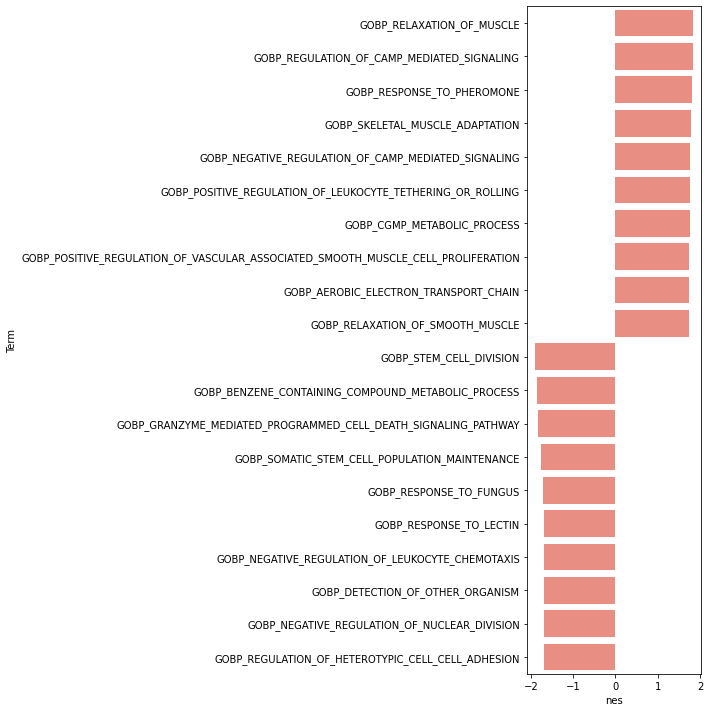

In [256]:
visual_top(result=pak4_media_gsea.res2d,
           top_term=10,
           figsize=(10, 10),
           savepath=panel_home + 'GSEA_PAK4KO_WT_media_in_vitro.png')

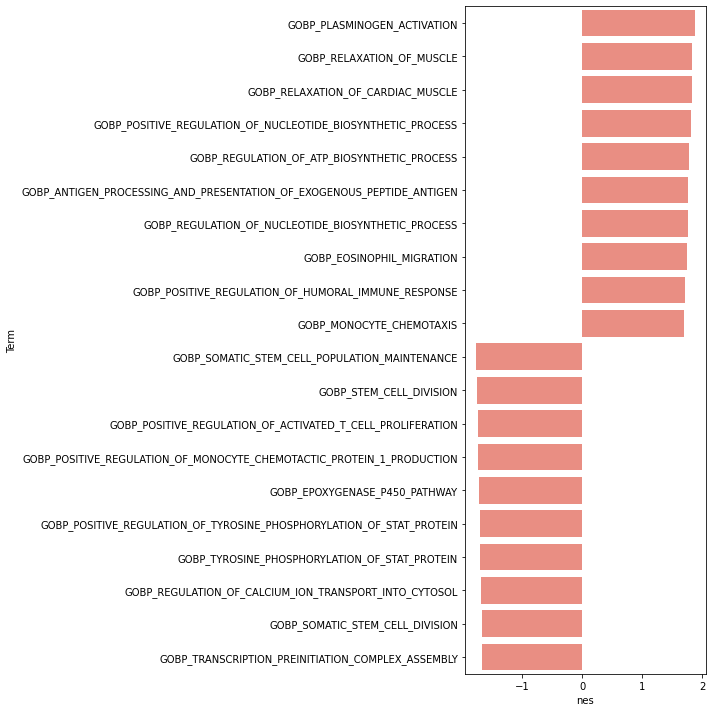

In [185]:
visual_top(result=pak4_ifng_gsea.res2d,
           top_term=10,
           figsize=(10, 10),
           savepath=panel_home + 'GSEA_PAK4KO_WT_IFNG_in_vitro.png')

In [76]:
pak4_ifng_gsea.res2d[:20]

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
GOBP_POSITIVE_REGULATION_OF_NUCLEOTIDE_BIOSYNTHETIC_PROCESS,0.842932,1.824162,0.000000,0.148465,22,22,Eno1b;Ppargc1a;mt-Co2;Bcl2l1;Slc25a12;Il4;Nduf...,Eno1b;Ppargc1a;mt-Co2;Bcl2l1
GOBP_RELAXATION_OF_CARDIAC_MUSCLE,0.883582,1.830679,0.000000,0.162257,16,16,Pde4d;Pde5a;Akap6;Camk2d;Camk2g;Rgs2;Pik3ca;Pd...,Pde4d;Pde5a;Akap6;Camk2d;Camk2g;Rgs2;Pik3ca;Pd...
GOBP_PLASMINOGEN_ACTIVATION,0.809017,1.877422,0.000000,0.204444,27,24,Eno1b;Hpn;Pgk1;Plaur;Dhcr24;Plgrkt;Serpine1;Ct...,Eno1b;Hpn;Pgk1;Plaur;Dhcr24;Plgrkt
GOBP_REGULATION_OF_NUCLEOTIDE_BIOSYNTHETIC_PROCESS,0.774444,1.763762,0.000000,0.211398,38,36,Eno1b;Ppargc1a;Snca;mt-Co2;Ak4;Bcl2l1;Slc25a12...,Eno1b;Ppargc1a;Snca;mt-Co2;Ak4;Bcl2l1
GOBP_RELAXATION_OF_MUSCLE,0.792683,1.840805,0.000000,0.214180,37,35,Pde4d;Pde5a;Akap6;Camk2d;Camk2g;Prkg1;Rgs2;Pik...,Pde4d;Pde5a;Akap6;Camk2d;Camk2g;Prkg1;Rgs2;Pik...
GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_EXOGENOUS_PEPTIDE_ANTIGEN,0.753615,1.773114,0.000000,0.225538,29,27,H2-DMb1;H2-K1;Cd74;B2m;H2-DMa;Tapbp;Mfsd6;Traf...,H2-DMb1;H2-K1;Cd74;B2m;H2-DMa;Tapbp;Mfsd6;Traf...
GOBP_REGULATION_OF_ATP_BIOSYNTHETIC_PROCESS,0.822999,1.785083,0.000000,0.227809,25,23,Eno1b;Ppargc1a;mt-Co2;Ak4;Bcl2l1;Slc25a12;Il4;...,Eno1b;Ppargc1a;mt-Co2;Ak4;Bcl2l1
GOBP_EOSINOPHIL_MIGRATION,0.796436,1.750377,0.024390,0.237301,27,25,Lgals3;Il4;Adam8;Ccl5;Cd300a;Ptger4;Ccl8;Ccl6;...,Lgals3;Il4;Adam8;Ccl5
GOBP_POSITIVE_REGULATION_OF_MONOCYTE_CHEMOTACTIC_PROTEIN_1_PRODUCTION,-0.882948,-1.739869,0.000000,0.325072,19,17,Selenok;Adipoq;Cd84;Twist1;Nod2;Oas1d;Oas1h;Il...,Oas1a;Oas1g;Syk;Mcoln2


In [77]:
ifng_pak4ko_gsea.res2d[:20]

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
GOBP_RESPONSE_TO_INTERFERON_ALPHA,0.930728,1.853427,0.000000,0.015379,32,29,Tgtp1;Ifit3;Ifitm3;Bst2;Ifit1;Eif2ak2;Ifi204;A...,Tgtp1;Ifit3;Ifitm3;Bst2;Ifit1;Eif2ak2;Ifi204;A...
GOBP_PEPTIDE_CROSS_LINKING,0.933919,1.849637,0.000000,0.015422,45,26,Thbs1;Fn1;Tgm2;Abca7;Anxa1;Epb42;Spock2;Ndnf;C...,Thbs1;Fn1;Tgm2
GOBP_POST_TRANSLATIONAL_PROTEIN_MODIFICATION,0.791043,1.853445,0.000000,0.015448,58,58,Igtp;Irgm1;Irgm2;Parp14;Parp12;Parp10;Parp3;Pa...,Igtp;Irgm1;Irgm2;Parp14;Parp12;Parp10;Parp3;Pa...
GOBP_POSITIVE_REGULATION_OF_DEFENSE_RESPONSE_TO_VIRUS_BY_HOST,0.813982,1.857135,0.025641,0.015476,33,29,Stat1;Parp9;Dtx3l;Pml;Pycard;Il12rb1;Zc3h12a;T...,Stat1;Parp9;Dtx3l;Pml;Pycard;Il12rb1;Zc3h12a;T...
GOBP_NEUTROPHIL_MIGRATION,0.705476,1.844770,0.000000,0.015574,131,120,Cxcl10;Cxcl9;Cx3cl1;Myd88;Slamf8;Slit2;Cd74;Lg...,Cxcl10;Cxcl9;Cx3cl1;Myd88;Slamf8;Slit2;Cd74;Lg...
GOBP_POSITIVE_REGULATION_OF_TUMOR_NECROSIS_FACTOR_SUPERFAMILY_CYTOKINE_PRODUCTION,0.712860,1.853592,0.000000,0.015634,115,109,Thbs1;Stat3;Ifih1;Nod1;Lrrk2;Arid5a;Tlr3;Myd88...,Thbs1;Stat3;Ifih1;Nod1;Lrrk2;Arid5a;Tlr3;Myd88...
GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_EXOGENOUS_ANTIGEN,0.905125,1.882115,0.000000,0.015638,36,34,Tap1;Tap2;Tapbp;Psme2;Psme1;H2-K1;B2m;H2-DMa;C...,Tap1;Tap2;Tapbp;Psme2;Psme1;H2-K1;B2m;H2-DMa;C...
GOBP_RESPONSE_TO_TYPE_I_INTERFERON,0.837178,1.859274,0.000000,0.015667,64,59,Zbp1;Nlrc5;Stat1;Ifitm3;Isg15;Irf7;Stat2;Samhd...,Zbp1;Nlrc5;Stat1;Ifitm3;Isg15;Irf7;Stat2;Samhd...
GOBP_POSITIVE_REGULATION_OF_IMMUNE_SYSTEM_PROCESS,0.616862,1.895549,0.000000,0.015675,1088,993,Igtp;Irgm1;Irgm2;Cxcl10;Zbp1;Nlrc5;Irf1;Tap2;P...,Igtp;Irgm1;Irgm2;Cxcl10;Zbp1;Nlrc5;Irf1;Tap2;P...


In [79]:
ifng_pak4wt_gsea.res2d[:20]

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
GOBP_ACTIVATION_OF_INNATE_IMMUNE_RESPONSE,0.729804,2.038566,0.0,0.0,236,226,Igtp;Irgm2;Irgm1;Zbp1;Irf1;Nod1;Ifi35;Ifih1;If...,Igtp;Irgm2;Irgm1;Zbp1;Irf1;Nod1;Ifi35;Ifih1;If...
GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION,0.816645,2.057937,0.0,0.0,127,111,Tap1;Tap2;Thbs1;Psmb9;Tapbp;Tapbpl;Psme2;Erap1...,Tap1;Tap2;Thbs1;Psmb9;Tapbp;Tapbpl;Psme2;Erap1...
GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_PEPTIDE_ANTIGEN,0.856492,1.971798,0.0,0.0,78,64,Tap1;Tap2;Tapbp;Tapbpl;Erap1;H2-T23;H2-T22;H2-...,Tap1;Tap2;Tapbp;Tapbpl;Erap1;H2-T23;H2-T22;H2-...
GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I,0.879239,2.000696,0.0,0.0,54,44,Tap1;Tap2;Tapbp;Tapbpl;Erap1;H2-T23;H2-T22;H2-...,Tap1;Tap2;Tapbp;Tapbpl;Erap1;H2-T23;H2-T22;H2-...
GOBP_BIOLOGICAL_PROCESS_INVOLVED_IN_INTERSPECIES_INTERACTION_BETWEEN_ORGANISMS,0.684413,2.114724,0.0,0.0,1761,1459,Igtp;Gbp2;Tgtp1;Iigp1;Gm12250;Irgm2;Irgm1;Gbp7...,Igtp;Gbp2;Tgtp1;Iigp1;Gm12250;Irgm2;Irgm1;Gbp7...
GOBP_CELLULAR_RESPONSE_TO_BIOTIC_STIMULUS,0.733556,2.042655,0.0,0.0,328,250,Igtp;Gbp2;Irgm2;Irgm1;Gbp6;Gbp10;Cxcl10;Irf8;S...,Igtp;Gbp2;Irgm2;Irgm1;Gbp6;Gbp10;Cxcl10;Irf8;S...
GOBP_CELLULAR_RESPONSE_TO_INTERFERON_BETA,0.964638,2.300437,0.0,0.0,59,55,Igtp;Gbp2;Tgtp2;Tgtp1;Iigp1;Ifi47;Irgm2;Irgm1;...,Igtp;Gbp2;Tgtp2;Tgtp1;Iigp1;Ifi47;Irgm2;Irgm1;...
GOBP_CELLULAR_RESPONSE_TO_TYPE_II_INTERFERON,0.871530,2.211521,0.0,0.0,117,114,Igtp;Gbp2;Irgm2;Irgm1;Gbp7;Gbp6;Gbp10;Gbp3;Gbp...,Igtp;Gbp2;Irgm2;Irgm1;Gbp7;Gbp6;Gbp10;Gbp3;Gbp...
GOBP_CYTOKINE_MEDIATED_SIGNALING_PATHWAY,0.751327,2.138878,0.0,0.0,428,393,Igtp;Iigp1;Irgm2;Irgm1;Cxcl10;Zbp1;Irf1;Nlrc5;...,Igtp;Iigp1;Irgm2;Irgm1;Cxcl10;Zbp1;Irf1;Nlrc5;...


In [240]:
pak4_media_gsea.res2d.loc['GOBP_AUTOPHAGY_OF_MITOCHONDRION', :]

es                                                       0.399709
nes                                                       1.05344
pval                                                     0.326531
fdr                                                      0.704712
geneset_size                                                   84
matched_size                                                   81
genes           Wipi1;Smurf1;Mul1;Capn10;Map1lc3a;Atg4b;Trp53;...
ledge_genes     Wipi1;Smurf1;Mul1;Capn10;Map1lc3a;Atg4b;Trp53;...
Name: GOBP_AUTOPHAGY_OF_MITOCHONDRION, dtype: object

In [239]:
pak4_ifng_gsea.res2d.loc['GOBP_AUTOPHAGY_OF_MITOCHONDRION', :]

es                                                      -0.341547
nes                                                     -0.859636
pval                                                     0.757576
fdr                                                      0.896914
geneset_size                                                   84
matched_size                                                   81
genes           Hdac6;Snx30;Atpif1;Atg9a;Pink1;Optn;Lrba;Becn1...
ledge_genes     Gabarapl2;Map1lc3b;Fis1;Retreg1;Bnip3;Hk2;Cers...
Name: GOBP_AUTOPHAGY_OF_MITOCHONDRION, dtype: object

In [241]:
ifng_pak4ko_gsea.res2d.loc['GOBP_AUTOPHAGY_OF_MITOCHONDRION', :]

es                                                      -0.415636
nes                                                     -0.978794
pval                                                     0.517857
fdr                                                      0.752267
geneset_size                                                   84
matched_size                                                   81
genes           Hk2;Fbxo7;Smurf1;Htt;Tspo;Huwe1;Cttn;Slc25a5;B...
ledge_genes     Sqstm1;Rb1cc1;Clec16a;Gabarap;Tomm7;Wipi2;Map1...
Name: GOBP_AUTOPHAGY_OF_MITOCHONDRION, dtype: object

In [83]:
ifng_pak4wt_gsea.res2d.loc['GOBP_AUTOPHAGY_OF_MITOCHONDRION', :]

es                                                      -0.295796
nes                                                     -0.779969
pval                                                         0.98
fdr                                                      0.940419
geneset_size                                                   84
matched_size                                                   81
genes           Hk2;Smurf1;Phb2;Htt;Bnip3;Rb1cc1;Snx7;Mul1;Bec...
ledge_genes     Mfn2;Cers1;Tomm7;Pink1;Arfip2;Gabarapl1;Hdac6;...
Name: GOBP_AUTOPHAGY_OF_MITOCHONDRION, dtype: object

In [242]:
from sklearn.decomposition import PCA

In [282]:
expr_invitro = gabris_56_final[sample_info[sample_info['System'] == 'In vitro'][:12].index]

In [261]:
expr_invitro

,B16_IFNG-KO62_IFNg_1,B16_IFNG-KO62_IFNg_2,B16_IFNG-KO62_IFNg_3,B16_IFNG-KO62_media_1,B16_IFNG-KO62_media_2,B16_IFNG-KO62_media_3,B16_IFNG-WT_IFNg_1,B16_IFNG-WT_IFNg_2,B16_IFNG-WT_IFNg_3,B16_IFNG-WT_media_1,B16_IFNG-WT_media_2,B16_IFNG-WT_media_3
Gene Name,,,,,,,,,,,,
0610005C13Rik,0.024030,0.074660,0.042635,0.000000,0.056271,0.069235,0.124900,0.102082,0.085835,0.028945,0.072660,0.068940
0610006L08Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610009B22Rik,4.158697,4.353643,4.312435,4.343187,4.312529,4.282056,4.204739,4.190057,4.231137,4.238873,4.303092,4.330064
0610009E02Rik,0.065815,0.136130,0.166676,0.182062,0.095922,0.291283,0.406344,0.368602,0.317918,0.077999,0.207406,0.581507
0610009L18Rik,1.595255,1.466837,1.351756,1.603839,1.591039,1.068076,1.147210,1.046084,1.280230,0.957009,1.026180,1.092588
...,...,...,...,...,...,...,...,...,...,...,...,...
n-R5s93,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n-R5s96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.249749,0.000000,0.000000,0.265077,0.000000
n-R5s97,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127207,0.000000,0.000000,0.000000,0.000000


In [268]:
z_expr_invitro = (expr_invitro.T - expr_invitro.T.mean(axis=0)) / expr_invitro.T.std(axis=0).T

In [302]:
z_expr_invitro

,B16_IFNG-KO62_IFNg_1,B16_IFNG-KO62_IFNg_2,B16_IFNG-KO62_IFNg_3,B16_IFNG-KO62_media_1,B16_IFNG-KO62_media_2,B16_IFNG-KO62_media_3,B16_IFNG-WT_IFNg_1,B16_IFNG-WT_IFNg_2,B16_IFNG-WT_IFNg_3,B16_IFNG-WT_media_1,B16_IFNG-WT_media_2,B16_IFNG-WT_media_3
Gene Name,,,,,,,,,,,,
0610005C13Rik,-0.690497,-0.668041,-0.681243,-0.699590,-0.674419,-0.667559,-0.643690,-0.655578,-0.664091,-0.687003,-0.666581,-0.670028
0610006L08Rik,-0.701917,-0.703428,-0.701484,-0.699590,-0.701060,-0.700398,-0.702718,-0.703816,-0.704639,-0.700697,-0.700871,-0.702571
0610009B22Rik,1.274598,1.360126,1.345963,1.355523,1.340635,1.330587,1.284423,1.276180,1.294120,1.304611,1.329871,1.341400
0610009E02Rik,-0.670637,-0.638905,-0.622351,-0.613441,-0.655647,-0.562242,-0.510681,-0.529634,-0.554457,-0.663797,-0.602991,-0.428075
0610009L18Rik,0.056264,-0.008172,-0.059701,0.059316,0.052191,-0.193808,-0.160551,-0.209492,-0.099868,-0.247959,-0.216590,-0.186824
...,...,...,...,...,...,...,...,...,...,...,...,...
n-R5s93,-0.701917,-0.703428,-0.701484,-0.699590,-0.701060,-0.700398,-0.702718,-0.703816,-0.704639,-0.700697,-0.700871,-0.702571
n-R5s96,-0.701917,-0.703428,-0.701484,-0.699590,-0.701060,-0.700398,-0.702718,-0.585798,-0.704639,-0.700697,-0.575775,-0.702571
n-R5s97,-0.701917,-0.703428,-0.701484,-0.699590,-0.701060,-0.700398,-0.702718,-0.643705,-0.704639,-0.700697,-0.700871,-0.702571


In [274]:
pca_fit = PCA(n_components=2, random_state=0)
pca_invitro_pca = df(pca_fit.fit_transform(z_expr_invitro.T), columns=[i for i in range(2)], index=z_expr_invitro.columns)

In [277]:
pca_invitro_pca['PAK4'] = s_invitro['PAK4']
pca_invitro_pca['Treatment'] = s_invitro['Treatment']

<AxesSubplot:xlabel='0', ylabel='1'>

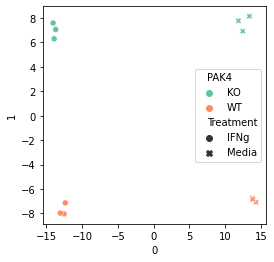

In [279]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x=0, y=1, hue='PAK4', style='Treatment', data=pca_invitro_pca)

In [321]:
pak4_media

,log2fc(tr-ct),mean_tr,mean_ct,t_stat,t_p,t_log10p
Gene Name,,,,,,
0610005C13Rik,-0.0150133,0.0418354,0.0568486,-0.590071,0.591495,0.228049
0610006L08Rik,0,0,0,NaN,NaN,NaN
0610009B22Rik,0.0219145,4.31259,4.29068,0.678585,0.540258,0.267399
0610009E02Rik,-0.0992152,0.189755,0.288971,-0.615482,0.588744,0.230073
0610009L18Rik,0.395726,1.42098,1.02526,2.18898,0.148591,0.828008
...,...,...,...,...,...,...
n-R5s93,0,0,0,NaN,NaN,NaN
n-R5s96,-0.0883589,0,0.0883589,-1,0.42265,0.374019
n-R5s97,0,0,0,NaN,NaN,NaN


In [322]:
pak4_ifng

,log2fc(tr-ct),mean_tr,mean_ct,t_stat,t_p,t_log10p
Gene Name,,,,,,
0610005C13Rik,-0.0571639,0.0471083,0.104272,-3.06876,0.0407216,1.39017
0610006L08Rik,0,0,0,NaN,NaN,NaN
0610009B22Rik,0.0662806,4.27493,4.20864,1.09511,0.380286,0.41989
0610009E02Rik,-0.241414,0.122873,0.364288,-6.13604,0.0038525,2.41426
0610009L18Rik,0.313441,1.47128,1.15784,3.20861,0.0326941,1.48553
...,...,...,...,...,...,...
n-R5s93,0,0,0,NaN,NaN,NaN
n-R5s96,-0.0832496,0,0.0832496,-1,0.42265,0.374019
n-R5s97,-0.0424022,0,0.0424022,-1,0.42265,0.374019


In [324]:
pak4_media_deg = pak4_media[pak4_media['t_p'] <= .05]
pak4_ifng_deg = pak4_ifng[pak4_ifng['t_p'] <= .05]
pak4_media_deg = pak4_media_deg[abs(pak4_media_deg['log2fc(tr-ct)']) >= .5]
pak4_ifng_deg = pak4_ifng_deg[abs(pak4_ifng_deg['log2fc(tr-ct)']) >= .5]
print(pak4_media_deg.shape)
print(pak4_ifng_deg.shape)

(602, 6)
(595, 6)


In [353]:
pak4_media.to_csv(result_home + 'PAK4KOvsWT_in_vitro_DEG_media.csv', sep=',')
pak4_ifng.to_csv(result_home + 'PAK4KOvsWT_in_vitro_DEG_ifng.csv', sep=',')

In [359]:
pak4_media_up_enrichr = gp.enrich(gene_list=list(pak4_media_deg[pak4_media_deg['log2fc(tr-ct)'] > 0].index),
                                   gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                                   outdir=None)


pak4_ifng_up_enrichr = gp.enrich(gene_list=list(pak4_ifng_deg[pak4_ifng_deg['log2fc(tr-ct)'] > 0].index),
                                  gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                                  outdir=None)

pak4_media_down_enrichr = gp.enrich(gene_list=list(pak4_media_deg[pak4_media_deg['log2fc(tr-ct)'] < 0].index),
                                     gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                                     outdir=None)


pak4_ifng_down_enrichr = gp.enrich(gene_list=list(pak4_ifng_deg[pak4_ifng_deg['log2fc(tr-ct)'] < 0].index),
                                    gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                                    outdir=None)

AttributeError: module 'gseapy' has no attribute 'enrich'

In [345]:
expr_invitro = expr_invitro[expr_invitro > 0].dropna(axis=0, how='all').fillna(0)
expr_invitro.shape

(26686, 12)

In [349]:
expr_invitro.to_csv(data_home + 'UCLA/processed/PAK4KO_in_vitro_final_expr.csv', sep=',')

In [351]:
s_invitro[:12].to_csv(data_home + 'UCLA/processed/PAK4KO_in_vitro_sample.csv', sep=',')

# PAK4 KO in vivo

In [189]:
s_invivo

,Model,PAK4,Treatment,System,Day collection (invivo)
Sample,,,,,
B16_invivo_first-KO62_Isotype_1,B16,KO,Isotype,In vivo,Day 6
B16_invivo_first-KO62_Isotype_2,B16,KO,Isotype,In vivo,Day 6
B16_invivo_first-KO62_Isotype_3,B16,KO,Isotype,In vivo,Day 6
B16_invivo_first-KO62_anti-PD-1_1,B16,KO,anti-PD1,In vivo,Day 6
B16_invivo_first-KO62_anti-PD-1_2,B16,KO,anti-PD1,In vivo,Day 6
B16_invivo_first-KO62_anti-PD-1_3,B16,KO,anti-PD1,In vivo,Day 6
B16_invivo_first-WT_Isotype_1,B16,WT,Isotype,In vivo,Day 6
B16_invivo_first-WT_Isotype_2,B16,WT,Isotype,In vivo,Day 6
B16_invivo_first-WT_Isotype_3,B16,WT,Isotype,In vivo,Day 6


In [281]:
expr_invivo = gabris_56_final[s_invivo.index]

In [293]:
expr_invivo = expr_invivo[expr_invivo > 0.].dropna(axis=0, how='all').fillna(0)

In [295]:
expr_invivo.shape

(32395, 28)

In [347]:
expr_invivo.to_csv(data_home + 'UCLA/processed/PAK4KO_in_vivo_final_expr.csv', sep=',')

In [352]:
s_invivo.to_csv(data_home + 'UCLA/processed/PAK4KO_in_vivo_sample.csv', sep=',')

In [310]:
z_expr_invivo = (expr_invivo.T - expr_invivo.T.mean(axis=0)) / expr_invivo.T.std(axis=0)

In [311]:
z_expr_invivo = z_expr_invivo.T

In [312]:
z_expr_invivo

,B16_invivo_first-KO62_Isotype_1,B16_invivo_first-KO62_Isotype_2,B16_invivo_first-KO62_Isotype_3,B16_invivo_first-KO62_anti-PD-1_1,B16_invivo_first-KO62_anti-PD-1_2,B16_invivo_first-KO62_anti-PD-1_3,B16_invivo_first-WT_Isotype_1,B16_invivo_first-WT_Isotype_2,B16_invivo_first-WT_Isotype_3,B16_invivo_first-WT_anti-PD-1_1,...,B16_invivo_last-KO62_anti-PD-1_3,B16_invivo_last-KO62_anti-PD-1_4,B16_invivo_last-WT_Isotype_1,B16_invivo_last-WT_Isotype_2,B16_invivo_last-WT_Isotype_3,B16_invivo_last-WT_Isotype_4,B16_invivo_last-WT_anti-PD-1_1,B16_invivo_last-WT_anti-PD-1_2,B16_invivo_last-WT_anti-PD-1_3,B16_invivo_last-WT_anti-PD-1_4
Gene Name,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,1.483750,-0.355414,-0.144177,-0.376323,-0.410388,-0.193951,3.397933,0.092283,1.729813,-0.339352,...,-0.383189,-0.506313,0.717777,-0.676365,-0.676365,-0.260000,0.303704,-0.214358,-0.403166,-0.564795
0610006L08Rik,1.465472,-0.444764,-0.251515,-0.629108,-0.584813,-0.379105,2.563460,0.071672,1.375042,-0.577412,...,-0.629108,-0.629108,0.984230,-0.554756,-0.629108,-0.472829,-0.505587,-0.341277,-0.629108,-0.571717
0610009B22Rik,0.942511,0.371588,-0.373063,-0.598269,-1.115785,-1.164763,-0.027517,0.585442,0.645944,-0.177086,...,-0.627603,-0.206272,2.079958,-0.058237,0.028909,0.105379,0.495508,0.026778,-0.879894,0.217045
0610009E02Rik,-1.119542,0.214707,0.539980,-0.636943,-0.214171,-0.435898,-1.119542,-0.077492,0.683027,-0.406048,...,0.723578,-0.719714,1.042014,-1.119542,-1.119542,-0.712938,-0.470961,1.649729,-0.679876,1.172014
0610009L18Rik,1.387471,0.587818,0.130117,-0.203702,-0.396729,-0.447921,-1.510514,-0.000700,-0.220067,-0.476692,...,-0.550674,0.147831,1.046526,-1.031899,-1.602211,0.318059,-1.091525,0.478718,-1.404861,-0.398195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n-R5s79,-0.188982,-0.188982,-0.188982,-0.188982,-0.188982,-0.188982,-0.188982,-0.188982,-0.188982,-0.188982,...,-0.188982,-0.188982,5.102520,-0.188982,-0.188982,-0.188982,-0.188982,-0.188982,-0.188982,-0.188982
n-R5s85,-0.271900,-0.271900,-0.271900,-0.271900,-0.271900,-0.271900,-0.271900,-0.271900,-0.271900,-0.271900,...,-0.271900,-0.271900,-0.271900,-0.271900,-0.271900,-0.271900,-0.271900,-0.271900,3.746429,3.322966
n-R5s88,1.846323,-0.131213,-0.261387,-0.611374,-0.839788,-0.345077,2.531271,-0.056379,1.782991,-0.839788,...,-0.839788,-0.839788,1.581460,-0.839788,-0.549154,-0.588494,-0.272690,-0.004606,-0.839788,-0.839788


In [313]:
pca_fit = PCA(n_components=2, random_state=0)
pca_invivo_pca = df(pca_fit.fit_transform(z_expr_invivo.T), columns=[i for i in range(2)], index=z_expr_invivo.columns)

In [317]:
pca_invivo_pca['PAK4'] = s_invivo['PAK4']
pca_invivo_pca['Treatment'] = s_invivo['Treatment']
pca_invivo_pca['Time'] = s_invivo['Day collection (invivo)']

<AxesSubplot:xlabel='0', ylabel='1'>

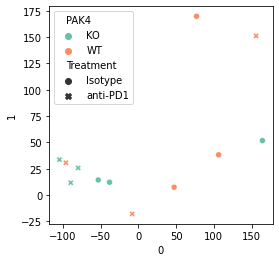

In [319]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x=0, y=1, hue='PAK4', style='Treatment', data=pca_invivo_pca[pca_invivo_pca['Time'] == 'Day 6'])

<AxesSubplot:xlabel='0', ylabel='1'>

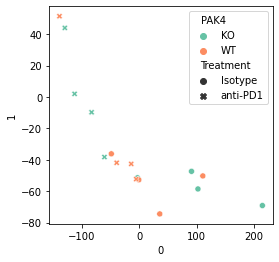

In [320]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x=0, y=1, hue='PAK4', style='Treatment', data=pca_invivo_pca[pca_invivo_pca['Time'] == 'day 10'])

In [200]:
# PAK4 KO vs WT: ISO
tmp_sample = s_invivo[s_invivo['Day collection (invivo)'] == 'Day 6']
tmp_sample = tmp_sample[tmp_sample['Treatment'] == 'Isotype']
pak4_iso_invivo_d6 = deg(expr_matrix=gabris_56_final,
                 group_tr=tmp_sample[tmp_sample['PAK4'] == 'KO'].index,
                 group_ct=tmp_sample[tmp_sample['PAK4'] == 'WT'].index)

In [208]:
# PAK4 KO vs WT: ISO
tmp_sample = s_invivo[s_invivo['Day collection (invivo)'] == 'day 10']
tmp_sample = tmp_sample[tmp_sample['Treatment'] == 'Isotype']
pak4_iso_invivo_d10 = deg(expr_matrix=gabris_56_final,
                 group_tr=tmp_sample[tmp_sample['PAK4'] == 'KO'].index,
                 group_ct=tmp_sample[tmp_sample['PAK4'] == 'WT'].index)

In [201]:
# PAK4 KO vs WT: anti-PD-1
tmp_sample = s_invivo[s_invivo['Day collection (invivo)'] == 'Day 6']
tmp_sample = tmp_sample[tmp_sample['Treatment'] == 'anti-PD1']
pak4_aPD1_invivo_d6 = deg(expr_matrix=gabris_56_final,
                 group_tr=tmp_sample[tmp_sample['PAK4'] == 'KO'].index,
                 group_ct=tmp_sample[tmp_sample['PAK4'] == 'WT'].index)

In [209]:
# PAK4 KO vs WT: anti-PD-1
tmp_sample = s_invivo[s_invivo['Day collection (invivo)'] == 'day 10']
tmp_sample = tmp_sample[tmp_sample['Treatment'] == 'anti-PD1']
pak4_aPD1_invivo_d10 = deg(expr_matrix=gabris_56_final,
                 group_tr=tmp_sample[tmp_sample['PAK4'] == 'KO'].index,
                 group_ct=tmp_sample[tmp_sample['PAK4'] == 'WT'].index)

In [229]:
# positive control: anti-PD-1 vs ISO, WT
tmp_sample = s_invivo[s_invivo['Day collection (invivo)'] == 'day 10']
tmp_sample = tmp_sample[tmp_sample['PAK4'] == 'WT']
aPD1_WT_invivo_d10 = deg(expr_matrix=gabris_56_final,
                 group_tr=tmp_sample[tmp_sample['Treatment'] == 'anti-PD1'].index,
                 group_ct=tmp_sample[tmp_sample['Treatment'] == 'Isotype'].index)

In [230]:
# positive control: anti-PD-1 vs ISO, PAK4
tmp_sample = s_invivo[s_invivo['Day collection (invivo)'] == 'day 10']
tmp_sample = tmp_sample[tmp_sample['PAK4'] == 'KO']
aPD1_PAK4KO_invivo_d10 = deg(expr_matrix=gabris_56_final,
                 group_tr=tmp_sample[tmp_sample['Treatment'] == 'anti-PD1'].index,
                 group_ct=tmp_sample[tmp_sample['Treatment'] == 'Isotype'].index)

In [ ]:
# PAK4 KO vs WT: anti-PD-1
tmp_sample = s_invivo[s_invivo['Day collection (invivo)'] == 'day 10']
tmp_sample = tmp_sample[tmp_sample['Treatment'] == 'anti-PD1']
pak4_aPD1_invivo_d10 = deg(expr_matrix=gabris_56_final,
                 group_tr=tmp_sample[tmp_sample['PAK4'] == 'KO'].index,
                 group_ct=tmp_sample[tmp_sample['PAK4'] == 'WT'].index)

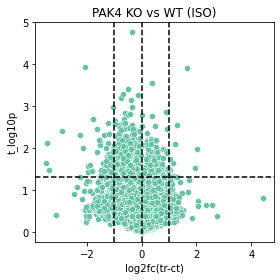

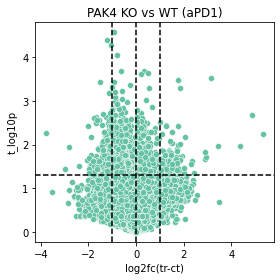

In [205]:
# volcano
plt.figure(figsize=(4, 4))
sns.scatterplot(x='log2fc(tr-ct)', y='t_log10p', data=pak4_iso_invivo_d6)
plt.axvline(x=-1., ls='--', c='k')
plt.axvline(x=1., ls='--', c='k')
plt.axvline(x=0., ls='--', c='k')
plt.axhline(y=-np.log10(.05), ls='--', c='k')
plt.title('PAK4 KO vs WT (ISO)')
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + 'PAK4KO_WT_ISO_d6_in_vivo.png', dpi=300, transparent=True)

# volcano
plt.figure(figsize=(4, 4))
sns.scatterplot(x='log2fc(tr-ct)', y='t_log10p', data=pak4_aPD1_invivo_d6)
plt.axvline(x=-1., ls='--', c='k')
plt.axvline(x=1., ls='--', c='k')
plt.axvline(x=0., ls='--', c='k')
plt.axhline(y=-np.log10(.05), ls='--', c='k')
plt.title('PAK4 KO vs WT (aPD1)')
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + 'PAK4KO_WT_aPD1_d6_in_vivo.png', dpi=300, transparent=True)


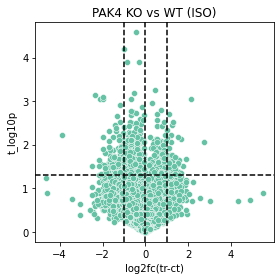

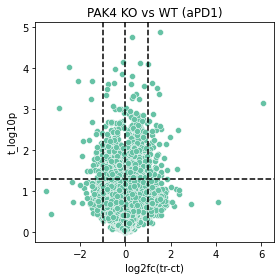

In [210]:
# volcano
plt.figure(figsize=(4, 4))
sns.scatterplot(x='log2fc(tr-ct)', y='t_log10p', data=pak4_iso_invivo_d10)
plt.axvline(x=-1., ls='--', c='k')
plt.axvline(x=1., ls='--', c='k')
plt.axvline(x=0., ls='--', c='k')
plt.axhline(y=-np.log10(.05), ls='--', c='k')
plt.title('PAK4 KO vs WT (ISO)')
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + 'PAK4KO_WT_ISO_d10_in_vivo.png', dpi=300, transparent=True)

# volcano
plt.figure(figsize=(4, 4))
sns.scatterplot(x='log2fc(tr-ct)', y='t_log10p', data=pak4_aPD1_invivo_d10)
plt.axvline(x=-1., ls='--', c='k')
plt.axvline(x=1., ls='--', c='k')
plt.axvline(x=0., ls='--', c='k')
plt.axhline(y=-np.log10(.05), ls='--', c='k')
plt.title('PAK4 KO vs WT (aPD1)')
plt.tight_layout()
fig = plt.gcf()
fig.savefig(panel_home + 'PAK4KO_WT_aPD1_d10_in_vivo.png', dpi=300, transparent=True)

In [211]:
# Pre-rank on FC
pak4_iso_d6_gsea = gp.prerank(pak4_iso_invivo_d6.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),
                             gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                             processes=24,
                             permutation_num=100,
                             outdir=None, seed=0, min_size=10, max_size=2000)

pak4_aPD1_d6_gsea = gp.prerank(pak4_aPD1_invivo_d6.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),
                            gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                            processes=24,
                            permutation_num=100,
                            outdir=None, seed=0, min_size=10, max_size=2000)

In [212]:
# Pre-rank on FC
pak4_iso_d10_gsea = gp.prerank(pak4_iso_invivo_d10.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),
                             gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                             processes=24,
                             permutation_num=100,
                             outdir=None, seed=0, min_size=10, max_size=2000)

pak4_aPD1_d10_gsea = gp.prerank(pak4_aPD1_invivo_d10.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),
                            gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                            processes=24,
                            permutation_num=100,
                            outdir=None, seed=0, min_size=10, max_size=2000)

In [231]:
# Pre-rank on FC
aPD1_WT_d10_gsea = gp.prerank(aPD1_WT_invivo_d10.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),
                             gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                             processes=24,
                             permutation_num=100,
                             outdir=None, seed=0, min_size=10, max_size=2000)

aPD1_PAK4KO_d10_gsea = gp.prerank(aPD1_PAK4KO_invivo_d10.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),
                            gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                            processes=24,
                            permutation_num=100,
                            outdir=None, seed=0, min_size=10, max_size=2000)

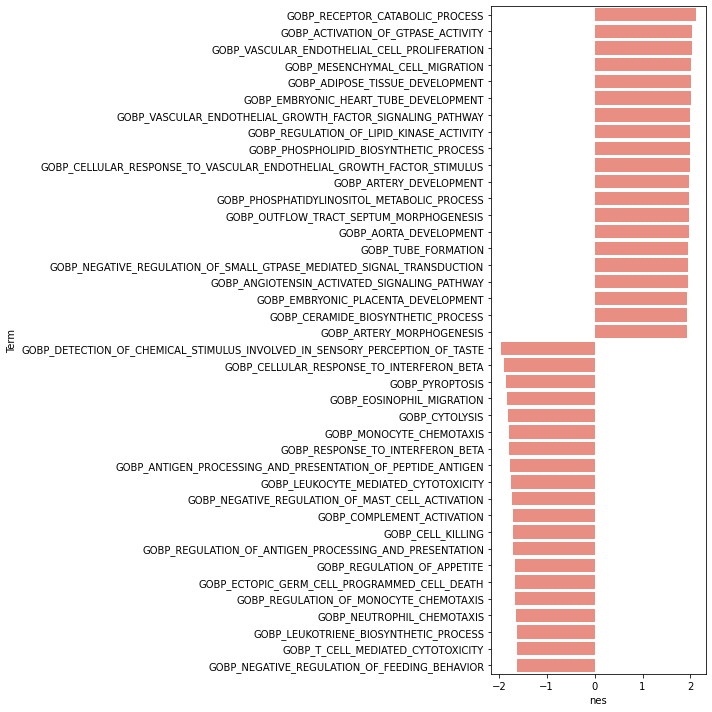

In [217]:
visual_top(result=pak4_iso_d6_gsea.res2d,
           top_term=20,
           figsize=(10, 10),
           savepath=panel_home + 'GSEA_PAK4KO_vs_WT_ISO_in_vivo_d6.png')

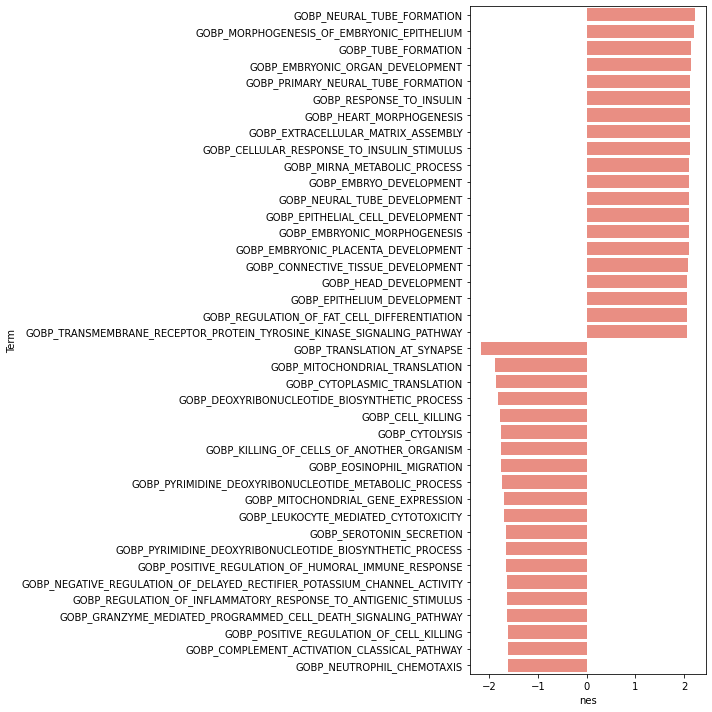

In [218]:
visual_top(result=pak4_aPD1_d6_gsea.res2d,
           top_term=20,
           figsize=(10, 10),
           savepath=panel_home + 'GSEA_PAK4KO_vs_WT_aPD_in_vivo_d6.png')

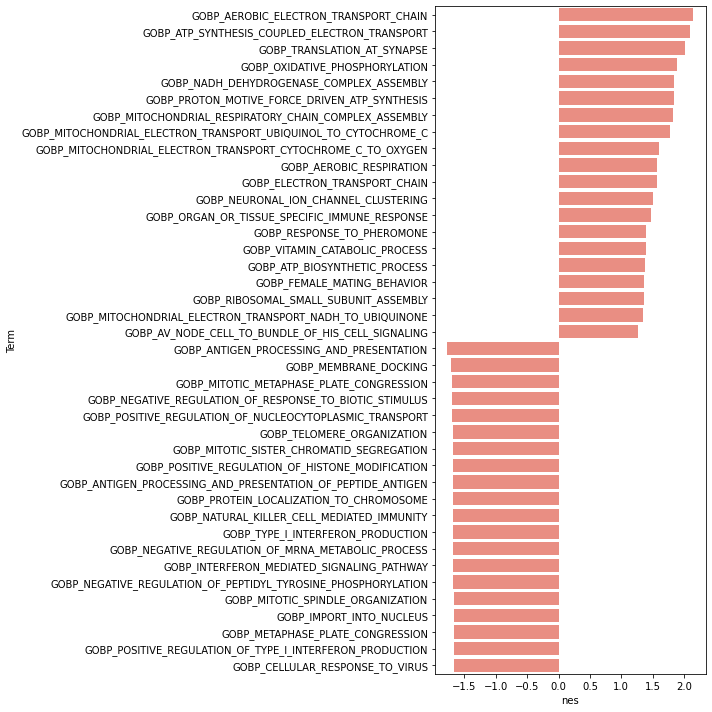

In [219]:
visual_top(result=pak4_iso_d10_gsea.res2d,
           top_term=20,
           figsize=(10, 10),
           savepath=panel_home + 'GSEA_PAK4KO_vs_WT_ISO_in_vivo_d10.png')

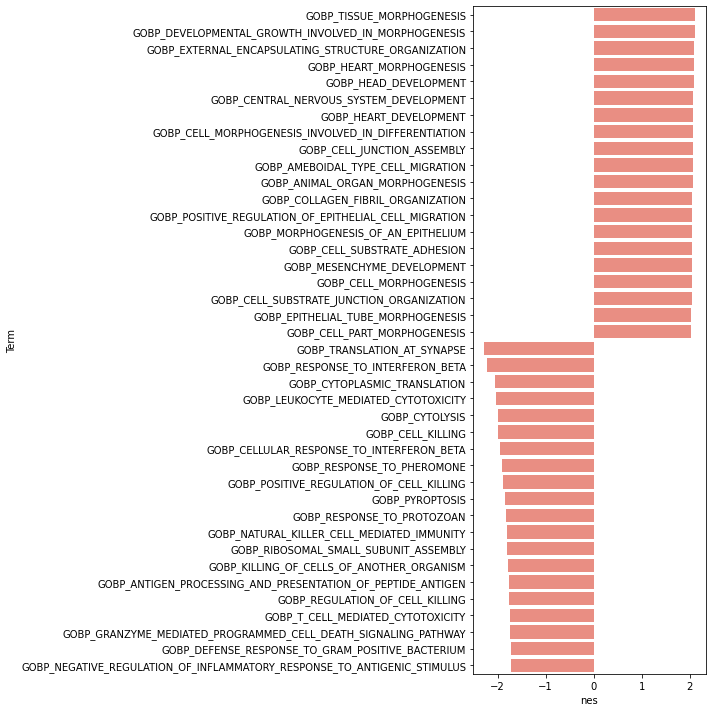

In [220]:
visual_top(result=pak4_aPD1_d10_gsea.res2d,
           top_term=20,
           figsize=(10, 10),
           savepath=panel_home + 'GSEA_PAK4KO_vs_WT_aPD_in_vivo_d10.png')

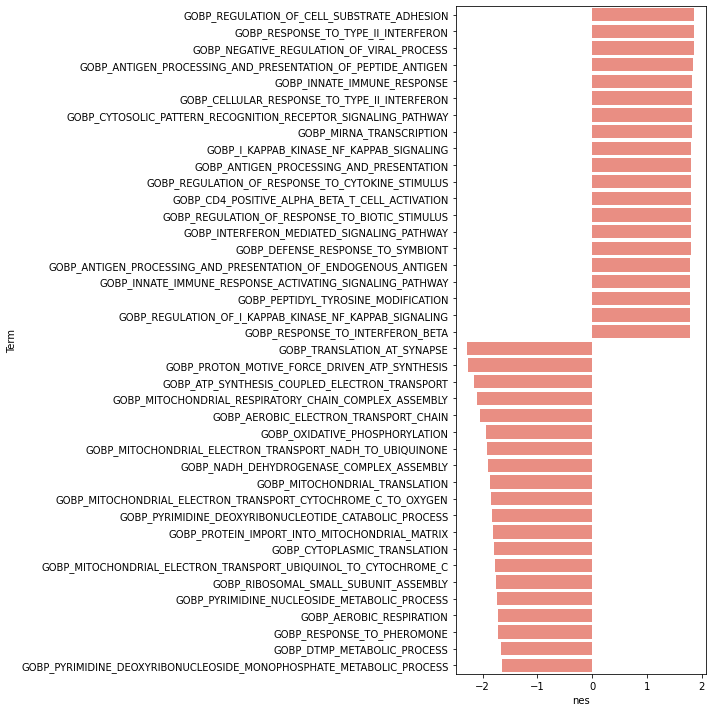

In [232]:
visual_top(result=aPD1_WT_d10_gsea.res2d,
           top_term=20,
           figsize=(10, 10),
           savepath=panel_home + 'GSEA_aPD1_vs_ISO_WT_in_vivo_d10.png')

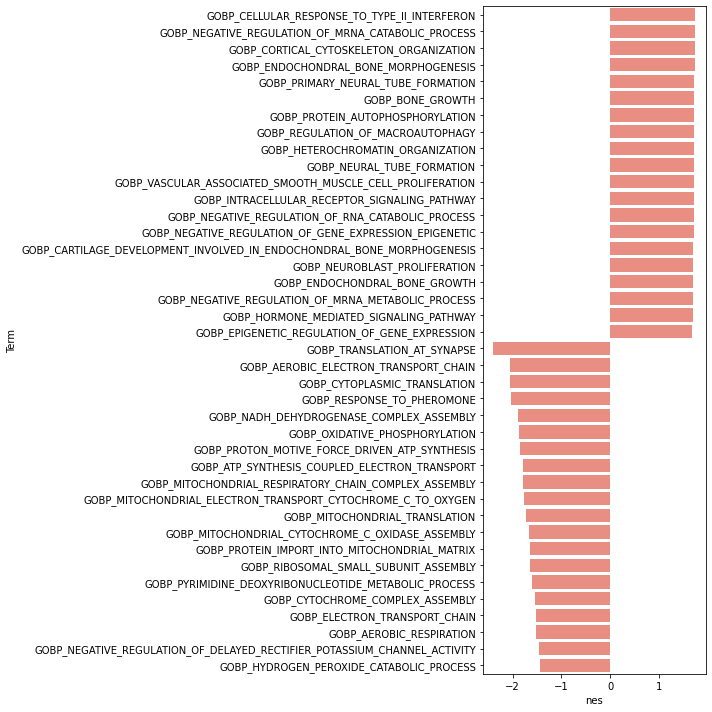

In [233]:
visual_top(result=aPD1_PAK4KO_d10_gsea.res2d,
           top_term=20,
           figsize=(10, 10),
           savepath=panel_home + 'GSEA_aPD1_vs_ISO_PAK4KO_in_vivo_d10.png')

# PAK4 inhibitor treatment (in vivo)

In [85]:
pak4i_invivo = pd.read_csv(data_home + 'UCLA/rnaseq_workflow_2022-05-04T00-53-36.stringtie.FPKM_PAK4inhibitorinvivo.txt',
                           header=0, index_col=0, sep='\t')
pak4i_invivo

/home/dyang-server/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Gene Name,Reference,Strand,Start,End,WT_Combo_1,WT_Combo_2,WT_Combo_3,WT_ISO_1_2,WT_ISO_2_2,WT_ISO_3_2,WT_PAK4i_1,WT_PAK4i_2,WT_PAK4i_3,WT_PD_1_2,WT_PD_2_2,WT_PD_3_2
Gene ID,,,,,,,,,,,,,,,,,
ENSMUSG00000051951,Xkr4,1,-,3205901,3671498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.008111,0.0,0.0
ENSMUSG00000102851,Gm18956,1,+,3252757,3253236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
ENSMUSG00000103377,Gm37180,1,-,3365731,3368549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
ENSMUSG00000104017,Gm37363,1,-,3375556,3377788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
ENSMUSG00000103025,Gm37686,1,-,3464977,3467285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000056050,Mia3,1,-,183326725,183369553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.05954,NaN,NaN,NaN
ENSMUSG00000107993,G930045G22Rik,6,-,50846713,50847770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN
ENSMUSG00000107993,G930045G22Rik,6,-,50849023,50878077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN


In [86]:
pak4i_invivo_tmp = pak4i_invivo.copy()
pak4i_invivo_tmp = pak4i_invivo_tmp.set_index('Gene Name')
pak4i_invivo_tmp = pak4i_invivo_tmp.drop(['Reference', 'Strand', 'Start', 'End'], axis=1)

In [88]:
pak4i_invivo_tmp = np.log2(pak4i_invivo_tmp + 1).dropna(axis=0, how='any')
pak4i_invivo_tmp = pak4i_invivo_tmp[pak4i_invivo_tmp > 0].dropna(axis=0, how='all').fillna(0)

In [90]:
pak4i_invivo_expr = pak4i_invivo_tmp.groupby(level=0).mean()

In [91]:
pak4i_invivo_expr.shape

(31429, 12)

In [362]:
pak4i_invivo_expr.to_csv(data_home + 'UCLA/processed/PAK4i_in_vivo_final_expr.csv', sep=',')

In [364]:
pak4i_info.to_csv(data_home + 'UCLA/processed/PAK4i_in_vivo_sample.csv', sep=',')

In [92]:
pak4i_invivo_expr.columns

Index(['WT_Combo_1', 'WT_Combo_2', 'WT_Combo_3', 'WT_ISO_1_2', 'WT_ISO_2_2',
       'WT_ISO_3_2', 'WT_PAK4i_1', 'WT_PAK4i_2', 'WT_PAK4i_3', 'WT_PD_1_2',
       'WT_PD_2_2', 'WT_PD_3_2'],
      dtype='object')

In [93]:
pak4i_info = df(index=pak4i_invivo_expr.columns, columns=['group'])
for s in pak4i_info.index:
    pak4i_info.at[s, 'group'] = '_'.join(s.split('_')[:2])

In [94]:
pak4i_info

,group
WT_Combo_1,WT_Combo
WT_Combo_2,WT_Combo
WT_Combo_3,WT_Combo
WT_ISO_1_2,WT_ISO
WT_ISO_2_2,WT_ISO
WT_ISO_3_2,WT_ISO
WT_PAK4i_1,WT_PAK4i
WT_PAK4i_2,WT_PAK4i
WT_PAK4i_3,WT_PAK4i
WT_PD_1_2,WT_PD


In [235]:
# PAK4i vs ISO
pak4i_iso = deg(expr_matrix=pak4i_invivo_expr,
                group_tr=pak4i_info[pak4i_info['group'] == 'WT_PAK4i'].index,
                group_ct=pak4i_info[pak4i_info['group'] == 'WT_ISO'].index)
# aPD vs ISO
aPD_iso = deg(expr_matrix=pak4i_invivo_expr,
              group_tr=pak4i_info[pak4i_info['group'] == 'WT_PD'].index,
              group_ct=pak4i_info[pak4i_info['group'] == 'WT_ISO'].index)

# Combo vs ISO
comb_iso = deg(expr_matrix=pak4i_invivo_expr,
               group_tr=pak4i_info[pak4i_info['group'] == 'WT_Combo'].index,
               group_ct=pak4i_info[pak4i_info['group'] == 'WT_ISO'].index)
# Combo vs aPD only
comb_aPD = deg(expr_matrix=pak4i_invivo_expr,
               group_tr=pak4i_info[pak4i_info['group'] == 'WT_Combo'].index,
               group_ct=pak4i_info[pak4i_info['group'] == 'WT_PD'].index)

In [96]:
# Pre-rank on FC
pak4i_iso_gsea = gp.prerank(pak4i_iso.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),
                            gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                            processes=24,
                            permutation_num=100,
                            outdir=None, seed=0, min_size=10, max_size=2000)

aPD_iso_gsea = gp.prerank(aPD_iso.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),
                          gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                          processes=24,
                          permutation_num=100,
                          outdir=None, seed=0, min_size=10, max_size=2000)

comb_iso_gsea = gp.prerank(comb_iso.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),
                           gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                           processes=24,
                           permutation_num=100,
                           outdir=None, seed=0, min_size=10, max_size=2000)

In [236]:
comb_aPD_gsea = gp.prerank(comb_aPD.sort_values(by='log2fc(tr-ct)', ascending=False)['log2fc(tr-ct)'].astype(float),
                           gene_sets=gsea_home + 'gene_sets/m5.go.bp.v2023.1.Mm.symbols.gmt',
                           processes=24,
                           permutation_num=100,
                           outdir=None, seed=0, min_size=10, max_size=2000)

In [104]:
pak4i_iso_gsea.res2d[:40]

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
GOBP_COLLAGEN_FIBRIL_ORGANIZATION,0.740122,2.201489,0.0,0.000000,61,60,Lox;Col3a1;Sfrp2;Col1a2;Col1a1;Dpt;Col5a2;Col5...,Lox;Col3a1;Sfrp2;Col1a2;Col1a1;Dpt;Col5a2;Col5...
GOBP_CYTOPLASMIC_TRANSLATION,-0.728681,-2.501658,0.0,0.000000,146,143,Cpeb1;Nck1;Cpeb3;Dph6;Rpl29;Igf2bp1;Fmr1;Cpeb2...,Cnbp;Rwdd1;Rpl11;Eif3d;Eif3m;Denr;Drg2;Eif2b3;...
GOBP_EXTERNAL_ENCAPSULATING_STRUCTURE_ORGANIZATION,0.620391,2.216309,0.0,0.000000,324,284,Lox;Col3a1;Postn;Sfrp2;Eln;Fbln2;Col1a2;Col1a1...,Lox;Col3a1;Postn;Sfrp2;Eln;Fbln2;Col1a2;Col1a1...
GOBP_PEPTIDE_CROSS_LINKING,0.883541,2.180235,0.0,0.000000,45,23,Col3a1;Dcn;Bgn;F13a1;Thbs1;Tgm2;Fn1;Anxa1;Tgm1...,Col3a1;Dcn;Bgn;F13a1;Thbs1;Tgm2;Fn1
GOBP_RESPONSE_TO_INTERFERON_BETA,-0.700836,-2.087860,0.0,0.000000,71,64,Ifi205;Plscr2;Ifi207;Pnpt1;Ifi204;Ikbke;Cdc34b...,Xaf1;Oas1g;Gm4841;Gm4951;Gm12185;Ifitm2;Gbp3;O...
GOBP_TRANSLATION_AT_SYNAPSE,-0.890054,-2.525442,0.0,0.000000,48,48,Rpl29;Rpl22;Rpl15;Rpl7a;Rpl7;Uba52;Rps10;Rpl5;...,Rpl5;Rpl34;Rps28;Rpl6;Eef2;Rpl35a;Rps27a;Rpl10...
GOBP_RIBOSOME_ASSEMBLY,-0.663119,-2.037677,0.0,0.001451,64,63,Mdn1;Ddx3x;Mterf3;Traf7;Prkdc;Dhx37;Nsun4;Dhx3...,Efl1;Abt1;Rrp7a;Mrpl20;Dhx29;Mrps11;Rpl11;Nle1...
GOBP_VASCULOGENESIS,0.647003,1.968108,0.0,0.002512,99,90,Aplnr;Fgfr1;Sox18;Heg1;Cd34;Rin2;Rapgef2;Kdr;T...,Aplnr;Fgfr1;Sox18;Heg1;Cd34;Rin2;Rapgef2;Kdr;T...
GOBP_ENDOCARDIAL_CUSHION_MORPHOGENESIS,0.750283,2.085908,0.0,0.002763,42,39,Aplnr;Sox9;Snai1;Mdm4;Twist1;Notch1;Tgfbr2;Ada...,Aplnr;Sox9;Snai1;Mdm4;Twist1;Notch1;Tgfbr2;Ada...


In [98]:
aPD_iso_gsea.res2d[:20]

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
GOBP_ACTIVATION_OF_IMMUNE_RESPONSE,0.652340,2.156684,0.0,0.0,479,427,Igtp;Tlr4;Cfd;Lcp2;Zbp1;Irgm2;C1qc;C1qa;Ifi203...,Igtp;Tlr4;Cfd;Lcp2;Zbp1;Irgm2;C1qc;C1qa;Ifi203...
GOBP_ACTIVATION_OF_INNATE_IMMUNE_RESPONSE,0.683111,2.149942,0.0,0.0,236,222,Igtp;Tlr4;Zbp1;Irgm2;Ifi203;Mndal;Ifi205;Ifi20...,Igtp;Tlr4;Zbp1;Irgm2;Ifi203;Mndal;Ifi205;Ifi20...
GOBP_ADAPTIVE_IMMUNE_RESPONSE,0.686694,2.222398,0.0,0.0,511,435,Gm7030;Slc11a1;C1qc;Serpina3g;C1qa;H2-Eb1;Adgr...,Gm7030;Slc11a1;C1qc;Serpina3g;C1qa;H2-Eb1;Adgr...
GOBP_ADAPTIVE_IMMUNE_RESPONSE_BASED_ON_SOMATIC_RECOMBINATION_OF_IMMUNE_RECEPTORS_BUILT_FROM_IMMUNOGLOBULIN_SUPERFAMILY_DOMAINS,0.689583,2.228799,0.0,0.0,366,322,Gm7030;Slc11a1;C1qc;C1qa;H2-Eb1;Fgl2;H2-DMb1;P...,Gm7030;Slc11a1;C1qc;C1qa;H2-Eb1;Fgl2;H2-DMb1;P...
GOBP_AEROBIC_ELECTRON_TRANSPORT_CHAIN,-0.754659,-2.471908,0.0,0.0,64,63,Cox7a1;mt-Nd2;Ndufs1;Cyct;Dld;Bdnf;Sdhaf2;Sdha...,Uqcrc2;Ndufaf1;Cycs;Ndufc2;Cox4i1;Uqcrfs1;mt-C...
GOBP_AEROBIC_RESPIRATION,-0.700862,-2.531891,0.0,0.0,193,179,Tnf;Cox7a1;1700066M21Rik;Mtfr2;Atp7a;Ndufb5;Dh...,Ndufc2;Cox4i1;Uqcrfs1;Idh2;Mdh1;Slc25a23;Aco2;...
GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION,0.815748,2.378118,0.0,0.0,127,109,Gm7030;Fcgr4;Slc11a1;H2-Eb1;Psmb8;Ctss;Fgl2;H2...,Gm7030;Fcgr4;Slc11a1;H2-Eb1;Psmb8;Ctss;Fgl2;H2...
GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_ENDOGENOUS_ANTIGEN,0.853031,2.260433,0.0,0.0,47,36,Gm7030;Tap2;Tap1;H2-Q6;H2-T23;H2-K1;H2-Q4;Erap...,Gm7030;Tap2;Tap1;H2-Q6;H2-T23;H2-K1;H2-Q4;Erap...
GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_EXOGENOUS_ANTIGEN,0.887922,2.267756,0.0,0.0,36,34,H2-Eb1;Ctss;H2-DMb1;Cd74;H2-Aa;H2-Ab1;Tap2;H2-...,H2-Eb1;Ctss;H2-DMb1;Cd74;H2-Aa;H2-Ab1;Tap2;H2-...


In [100]:
comb_iso_gsea.res2d[:20]

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
GOBP_ACTIVATION_OF_IMMUNE_RESPONSE,0.650374,2.214480,0.0,0.0,479,427,C1qc;Igtp;Irgm2;C1qa;C1qb;C3;Ifi204;Zbp1;Serpi...,C1qc;Igtp;Irgm2;C1qa;C1qb;C3;Ifi204;Zbp1;Serpi...
GOBP_ACTIVATION_OF_INNATE_IMMUNE_RESPONSE,0.690884,2.237110,0.0,0.0,236,222,Igtp;Irgm2;Ifi204;Zbp1;Ifi205;Ifi211;Ifi203;Tr...,Igtp;Irgm2;Ifi204;Zbp1;Ifi205;Ifi211;Ifi203;Tr...
GOBP_ADAPTIVE_IMMUNE_RESPONSE,0.686457,2.357056,0.0,0.0,511,435,C1qc;C1qa;Arg1;C1qb;C3;Adgre1;Il18bp;Serping1;...,C1qc;C1qa;Arg1;C1qb;C3;Adgre1;Il18bp;Serping1;...
GOBP_ADAPTIVE_IMMUNE_RESPONSE_BASED_ON_SOMATIC_RECOMBINATION_OF_IMMUNE_RECEPTORS_BUILT_FROM_IMMUNOGLOBULIN_SUPERFAMILY_DOMAINS,0.695715,2.294762,0.0,0.0,366,322,C1qc;C1qa;Arg1;C1qb;C3;Il18bp;Serping1;H2-Eb1;...,C1qc;C1qa;Arg1;C1qb;C3;Il18bp;Serping1;H2-Eb1;...
GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION,0.783408,2.489139,0.0,0.0,127,109,Ctss;Thbs1;H2-Eb1;Fcgr3;H2-Aa;Slc11a1;Fgl2;H2-...,Ctss;Thbs1;H2-Eb1;Fcgr3;H2-Aa;Slc11a1;Fgl2;H2-...
GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_ENDOGENOUS_ANTIGEN,0.790432,2.041633,0.0,0.0,47,36,H2-T23;Tapbp;Tap1;Tap2;H2-K1;Erap1;H2-Q6;Gm703...,H2-T23;Tapbp;Tap1;Tap2;H2-K1;Erap1;H2-Q6;Gm703...
GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_EXOGENOUS_ANTIGEN,0.858875,2.245399,0.0,0.0,36,34,Ctss;H2-Eb1;Fcgr3;H2-Aa;H2-Ab1;Cd74;H2-DMb1;Ta...,Ctss;H2-Eb1;Fcgr3;H2-Aa;H2-Ab1;Cd74;H2-DMb1;Ta...
GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_EXOGENOUS_PEPTIDE_ANTIGEN,0.889478,2.312333,0.0,0.0,29,27,Ctss;H2-Eb1;Fcgr3;H2-Aa;H2-Ab1;Cd74;H2-DMb1;Ta...,Ctss;H2-Eb1;Fcgr3;H2-Aa;H2-Ab1;Cd74;H2-DMb1;Ta...
GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_PEPTIDE_ANTIGEN,0.831228,2.392442,0.0,0.0,78,63,Ctss;H2-Eb1;Fcgr3;H2-Aa;Slc11a1;H2-Ab1;Cd74;H2...,Ctss;H2-Eb1;Fcgr3;H2-Aa;Slc11a1;H2-Ab1;Cd74;H2...


In [101]:
pak4i_iso_gsea.res2d.loc['GOBP_AUTOPHAGY_OF_MITOCHONDRION', :]

es                                                      -0.333138
nes                                                      -1.03175
pval                                                     0.392157
fdr                                                      0.829224
geneset_size                                                   84
matched_size                                                   80
genes           Snx30;Ogt;Vps13c;Smurf1;Htt;Atg2a;Clec16a;Rb1c...
ledge_genes     Fkbp8;Htra2;Fbxl4;Wdr45;Fundc2;Hdac6;Atg13;Map...
Name: GOBP_AUTOPHAGY_OF_MITOCHONDRION, dtype: object

In [102]:
comb_iso_gsea.res2d.loc['GOBP_AUTOPHAGY_OF_MITOCHONDRION', :]

es                                                       0.297941
nes                                                      0.867678
pval                                                     0.784615
fdr                                                      0.796535
geneset_size                                                   84
matched_size                                                   80
genes           Ogt;Vps13c;Rb1cc1;Snx30;Atg2a;Gba;Smurf1;Vps13...
ledge_genes     Ogt;Vps13c;Rb1cc1;Snx30;Atg2a;Gba;Smurf1;Vps13...
Name: GOBP_AUTOPHAGY_OF_MITOCHONDRION, dtype: object

In [103]:
aPD_iso_gsea.res2d.loc['GOBP_AUTOPHAGY_OF_MITOCHONDRION', :]

es                                                      -0.286886
nes                                                      -1.00993
pval                                                       0.4375
fdr                                                      0.729057
geneset_size                                                   84
matched_size                                                   80
genes           Ogt;Atg4b;Ulk1;Htt;Vps13c;Rb1cc1;Atg2a;Fbxw7;H...
ledge_genes     Atg12;Atg13;Srebf1;Cdkn2a;Pink1;Fis1;Map1lc3a;...
Name: GOBP_AUTOPHAGY_OF_MITOCHONDRION, dtype: object

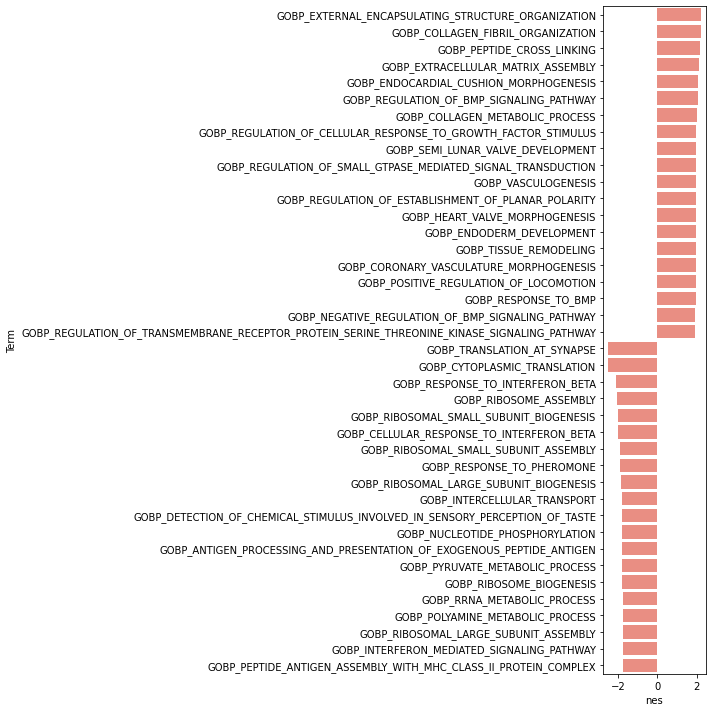

In [228]:
visual_top(result=pak4i_iso_gsea.res2d,
           top_term=20,
           figsize=(10, 10),
           savepath=panel_home + 'GSEA_PAK4i_ISO_in_vivo.png')

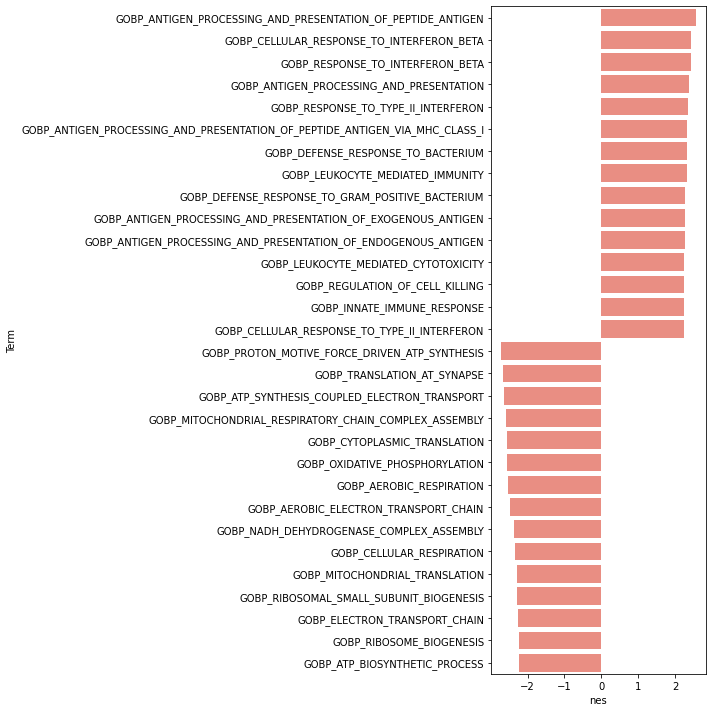

In [223]:
visual_top(result=aPD_iso_gsea.res2d,
           top_term=15,
           figsize=(10, 10),
           savepath=panel_home + 'GSEA_aPD_ISO_in_vivo.png')

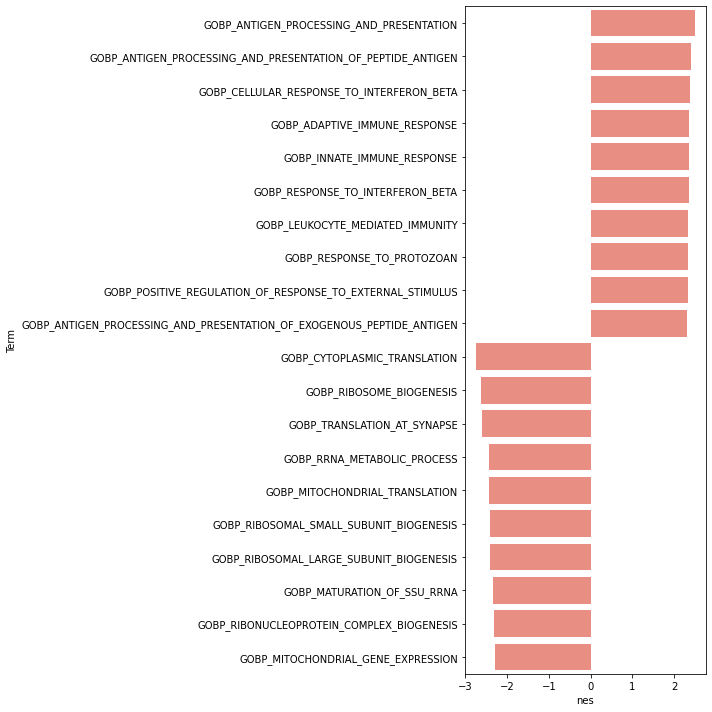

In [225]:
visual_top(result=comb_iso_gsea.res2d,
           top_term=10,
           figsize=(10, 10),
           savepath=panel_home + 'GSEA_COMBO_ISO_in_vivo.png')

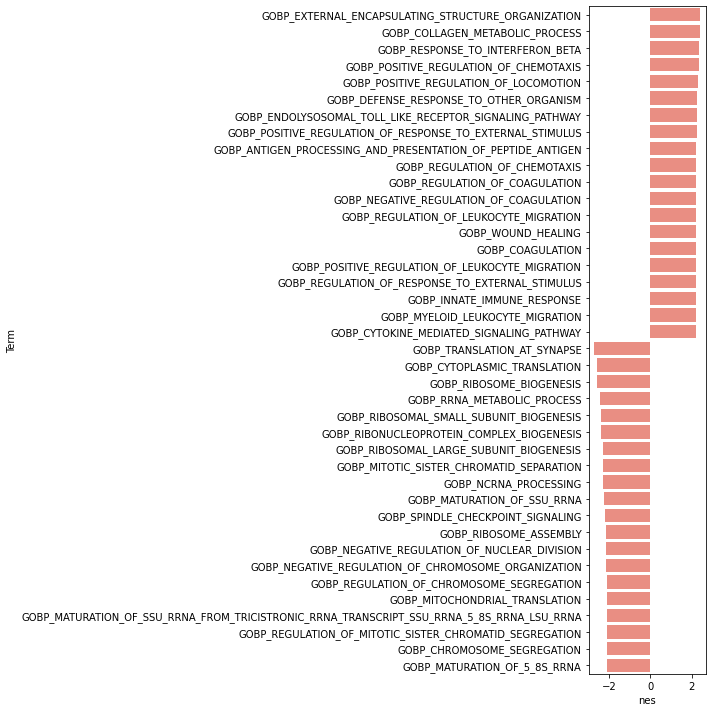

In [238]:
visual_top(result=comb_aPD_gsea.res2d,
           top_term=20,
           figsize=(10, 10),
           savepath=panel_home + 'GSEA_COMBO_aPD_in_vivo.png')